# 🧲 **For Stack Overflow users who are coding.....**

**This survey was conducted by Stack Overflow users. More than 80,000 users responded and that the survey shows rich statistical information on coding users.**

![Survey photo](http://images.unsplash.com/photo-1434626881859-194d67b2b86f?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1174&q=80)

**In this notebook, I used many images as plot backgrounds. Because this dataset(respond set) has 48 columns, I could not handle all of them. The dataset also have a lot of null value; this will bring not good result. Using images would be a great choice in this case in that readers can get intuitive information with the statistical results.** 

**I made plots only using seaborn and matplotlib, but the plots look unique and unfamiliar. I hope kagglers like my notebook.**

# **📂 Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_question = pd.read_csv("../input/stack-overflow-annual-developer-survey-2021/survey_results_questions.csv")
df_response = pd.read_csv("../input/stack-overflow-annual-developer-survey-2021/survey_results_responses.csv")

In [3]:
# Let's check their shape
print(df_question.shape)
print(df_response.shape)

(40, 6)
(83439, 48)


In [4]:
df_question.head()

qid       qname                                           question  \
0   QID2  MainBranch  Which of the following options best describes ...   
1  QID24  Employment  Which of the following best describes your cur...   
2   QID6     Country                                Where do you live?    
3   QID7    US_State  In which state or territory of the USA do you ...   
4   QID9  UK_Country  In which part of the United Kingdom do you liv...   

   force_resp type selector  
0        True   MC     SAVR  
1       False   MC     MAVR  
2        True   MC       DL  
3       False   MC       DL  
4       False   MC       DL

In [5]:
df_response.head(2)

ResponseId                              MainBranch  \
0           1          I am a developer by profession   
1           2  I am a student who is learning to code   

                                          Employment      Country US_State  \
0  Independent contractor, freelancer, or self-em...     Slovakia      NaN   
1                                 Student, full-time  Netherlands      NaN   

  UK_Country                                            EdLevel  \
0        NaN  Secondary school (e.g. American high school, G...   
1        NaN       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

      Age1stCode                                          LearnCode YearsCode  \
0  18 - 24 years  Coding Bootcamp;Other online resources (ex: vi...       NaN   
1  11 - 17 years  Other online resources (ex: videos, blogs, etc...         7   

   ...              Age Gender Trans                Sexuality  \
0  ...  25-34 years old    Man    No  Straight / Heterosexual   
1  ...  18-24 years old    Man    No  Straight / Heterosexual   

                      Ethnicity      Accessibility       MentalHealth  \
0  White or of European descent  None of the above  None of the above   
1  White or of European descent  None of the above  None of the above   

            SurveyLength SurveyEase ConvertedCompYearly  
0  Appropriate in length       Easy             62268.0  
1  Appropriate in length       Easy                 NaN  

[2 rows x 48 columns]

In [6]:
# Let's check missing value
print(df_question.isna().sum())
print(df_response.isna().sum())

qid           0
qname         0
question      0
force_resp    0
type          0
selector      0
dtype: int64
ResponseId                          0
MainBranch                          0
Employment                        116
Country                             0
US_State                        68519
UK_Country                      79021
EdLevel                           313
Age1stCode                        196
LearnCode                         476
YearsCode                        1798
YearsCodePro                    22223
DevType                         16955
OrgSize                         22713
Currency                        22359
CompTotal                       36256
CompFreq                        31289
LanguageHaveWorkedWith           1082
LanguageWantToWorkWith           6618
DatabaseHaveWorkedWith          13893
DatabaseWantToWorkWith          25140
PlatformHaveWorkedWith          31304
PlatformWantToWorkWith          41820
WebframeHaveWorkedWith          21732
WebframeWantToWor

**Only "MainBranch" and "Country" columns have no missing value. And there are a lot of missing value in almost columns, so I will explore data using some of them which have mot many missing value.**

# **⚡ Explore the data by individual column**

# What are the main branch of respondents?

In [7]:
pd.set_option('max_colwidth', None) # see all the contents in rows

MainBranch = df_response["MainBranch"].value_counts()
MainBranch = MainBranch.reset_index(name='count')
MainBranch

index  \
0                                                 I am a developer by profession   
1                                         I am a student who is learning to code   
2  I am not primarily a developer, but I write code sometimes as part of my work   
3                                                    I code primarily as a hobby   
4                       I used to be a developer by profession, but no longer am   
5                                                                  None of these   

   count  
0  58153  
1  12029  
2   6578  
3   4929  
4   1237  
5    513

In [8]:
# The contents are too long to contain in plot. 
# I added a column which summarized the main branch explanation.
MainBranch["revised_index"] = ["Developer", "Student learning to code",
                              "As part of work", "As a hobby",
                              "Developer in past", "None of these"]
MainBranch

index  \
0                                                 I am a developer by profession   
1                                         I am a student who is learning to code   
2  I am not primarily a developer, but I write code sometimes as part of my work   
3                                                    I code primarily as a hobby   
4                       I used to be a developer by profession, but no longer am   
5                                                                  None of these   

   count             revised_index  
0  58153                 Developer  
1  12029  Student learning to code  
2   6578           As part of work  
3   4929                As a hobby  
4   1237         Developer in past  
5    513             None of these

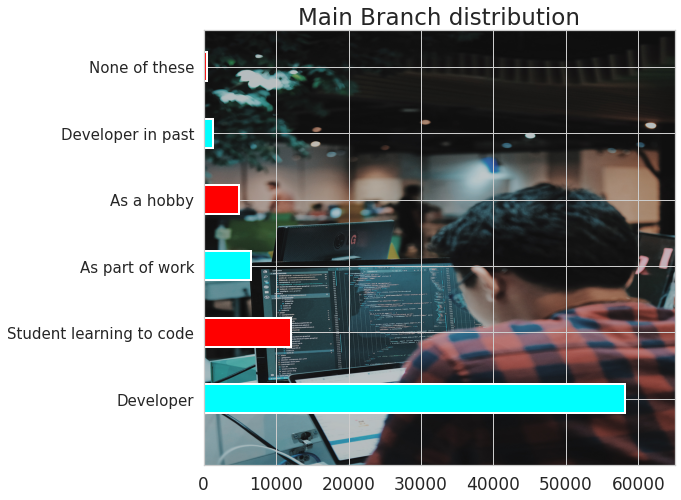

In [9]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12,8))
y_code = [55000*1/6,55000*2/6,55000*3/6,55000*4/6,55000*5/6, 55000*6/6]
ax.barh(width=MainBranch["count"], y=y_code, edgecolor = "white", linewidth=2,
         color=['cyan', 'red'], height=4000)
plt.xticks(fontsize=17)
plt.yticks(y_code, MainBranch["revised_index"], fontsize=15)
plt.title("Main Branch distribution", fontsize = 23)
img = plt.imread("../input/developer-unsplash/arif-riyanto-G1N9kDHqBrQ-unsplash.jpg")
plt.imshow(img, extent = [0,65000, 0,60000])
plt.show()

# What are the current job of respondents?

In [10]:
df_Empl = df_response["Employment"].value_counts().reset_index(name="Count")
df_Empl

index  Count
0                                    Employed full-time  53584
1                                    Student, full-time  11781
2  Independent contractor, freelancer, or self-employed   8041
3                    Not employed, but looking for work   2961
4                                    Employed part-time   2461
5                                    Student, part-time   2051
6                Not employed, and not looking for work   1228
7                                   I prefer not to say    890
8                                               Retired    326

In [11]:
df_Empl["revised_index"] = ["Employed full-time", "Student, full-time",
                            "Independently employed",
                            "Looking for work", "Employed part-time",
                            "Student, part-time", "Not looking for work",
                           "I prefer not to say", "Retired"]
df_Empl

index  Count  \
0                                    Employed full-time  53584   
1                                    Student, full-time  11781   
2  Independent contractor, freelancer, or self-employed   8041   
3                    Not employed, but looking for work   2961   
4                                    Employed part-time   2461   
5                                    Student, part-time   2051   
6                Not employed, and not looking for work   1228   
7                                   I prefer not to say    890   
8                                               Retired    326   

            revised_index  
0      Employed full-time  
1      Student, full-time  
2  Independently employed  
3        Looking for work  
4      Employed part-time  
5      Student, part-time  
6    Not looking for work  
7     I prefer not to say  
8                 Retired

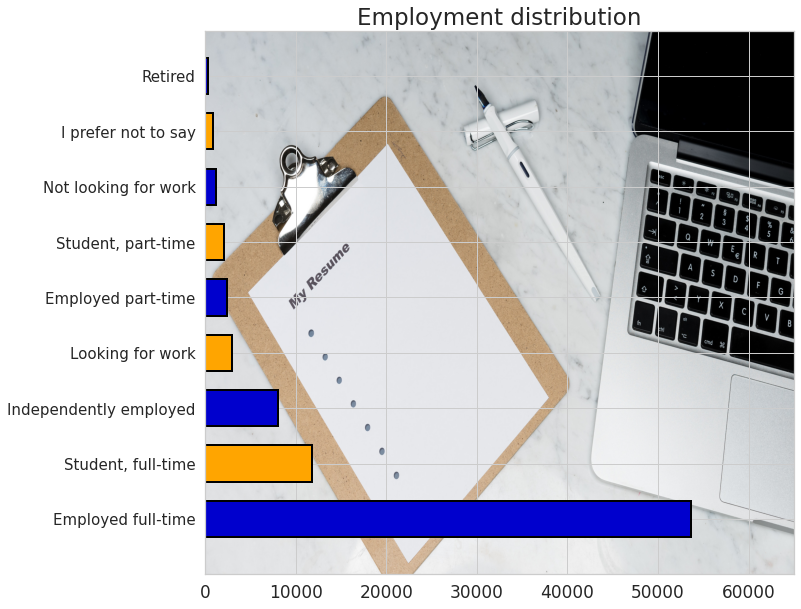

In [12]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12,10))
y_code = [55000*1/9,55000*2/9,55000*3/9,55000*4/9,55000*5/9,
          55000*6/9,55000*7/9,55000*8/9,55000*9/9]
ax.barh(width=df_Empl["Count"], y=y_code, edgecolor = "black", linewidth=2,
         color=['mediumblue', 'orange'], height=4000)

plt.xticks(fontsize=17)
plt.yticks(y_code, df_Empl["revised_index"], fontsize=15)
plt.title("Employment distribution", fontsize = 23)
img = plt.imread("../input/jobs-unsplash/markus-winkler-7iSEHWsxPLw-unsplash.jpg")
plt.imshow(img, extent = [0,65000, 0,60000])
plt.show()

# Which age group are respondents?

In [13]:
df_age = df_response["Age"].value_counts().reset_index(name="Count")
df_age

index  Count
0     25-34 years old  32568
1     18-24 years old  20993
2     35-44 years old  15183
3     45-54 years old   5472
4  Under 18 years old   5376
5     55-64 years old   1819
6   Prefer not to say    575
7   65 years or older    421

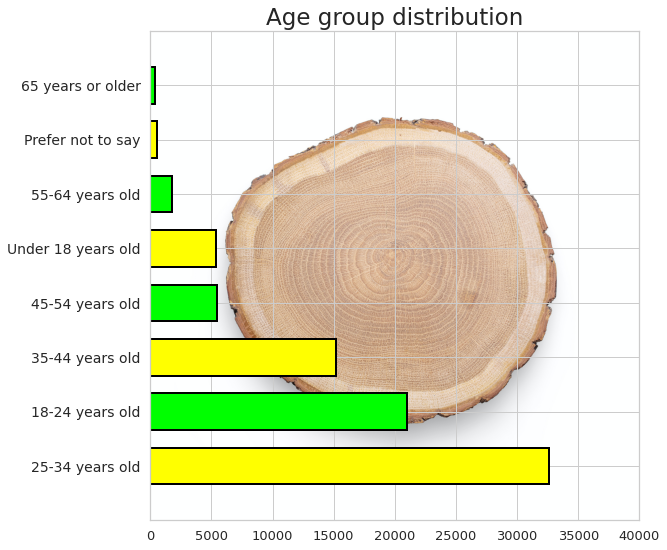

In [14]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,9))
y_code = [40000*1/9,40000*2/9,40000*3/9,40000*4/9,40000*5/9,
          40000*6/9,40000*7/9,40000*8/9]
ax.barh(width=df_age["Count"], y=y_code, edgecolor = "black", linewidth=2,
         color=['yellow', 'lime'], height=3000)
plt.xticks(fontsize=13)
plt.yticks(y_code, df_age["index"], fontsize=14)
plt.title("Age group distribution", fontsize = 23)
img = plt.imread("../input/age-unsplash/mockup-graphics-Rc1mMjR6bbo-unsplash.jpg")
plt.imshow(img, extent = [0,40000, 0,40000])
plt.show()

# Which operating system do respondents use?

In [15]:
df_os = df_response["OperatingSystem"].value_counts().reset_index(name="Count")
df_os 

index  Count
0                            Windows  37758
1                        Linux-based  21088
2                              MacOS  20984
3  Windows Subsystem for Linux (WSL)   2743
4            Other (please specify):    575
5                                BSD    146

In [16]:
# remove the characters in ()
df_os[['split_index', 'split_2']] = df_os['index'].str.split('(', n=1, expand=True)
# drop the characters in () culumn
df_os = df_os.drop(["split_2"], axis =1)
df_os

index  Count                   split_index
0                            Windows  37758                       Windows
1                        Linux-based  21088                   Linux-based
2                              MacOS  20984                         MacOS
3  Windows Subsystem for Linux (WSL)   2743  Windows Subsystem for Linux 
4            Other (please specify):    575                        Other 
5                                BSD    146                           BSD

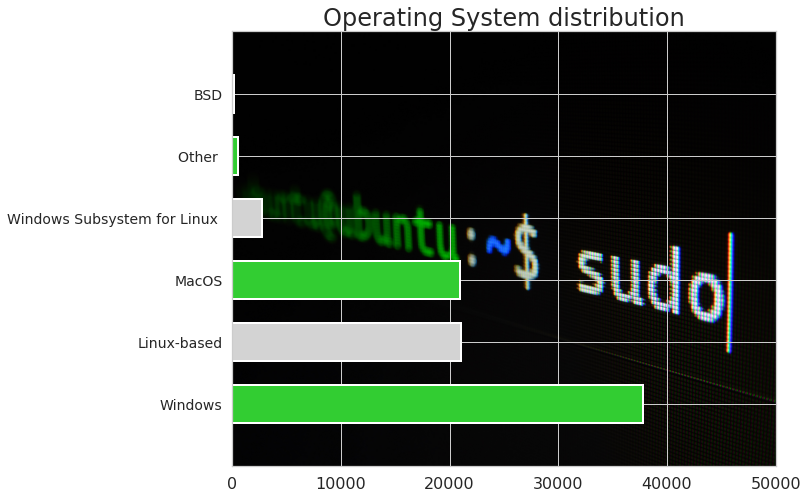

In [17]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(13,8))
y_code = [40000*1/7,40000*2/7,40000*3/7,40000*4/7,40000*5/7,
          40000*6/7]
ax.barh(width=df_os["Count"], y=y_code, edgecolor = "white", linewidth = 2,
         color=['limegreen', 'lightgray'], height=3500)
plt.xticks(fontsize=16)
plt.yticks(y_code, df_os["split_index"], fontsize=14)
plt.title("Operating System distribution", fontsize = 24)
img = plt.imread("../input/os-unsplash/gabriel-heinzer-4Mw7nkQDByk-unsplash.jpg")
plt.imshow(img, extent = [0,50000, 0,40000])
plt.show()

# What are the respondent's educational background?

In [18]:
df_ed = df_response["EdLevel"].value_counts().reset_index(name="Count")
df_ed

index  \
0                                        Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
1                                     Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
2                              Some college/university study without earning a degree   
3  Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)   
4                                          Other doctoral degree (Ph.D., Ed.D., etc.)   
5                                                           Primary/elementary school   
6                                                 Associate degree (A.A., A.S., etc.)   
7                                                                      Something else   
8                                                  Professional degree (JD, MD, etc.)   

   Count  
0  35357  
1  17512  
2  10589  
3   9534  
4   2567  
5   2479  
6   2231  
7   1601  
8   1256

In [19]:
# remove the characters in ()
df_ed[['split_index', 'split_2']] = df_ed['index'].str.split('(', n=1, expand=True)
df_ed = df_ed.drop(["split_2"], axis =1)

# revise the longest contents
df_ed.loc[2, "split_index"] = "College/university no degree"
df_ed

index  \
0                                        Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
1                                     Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
2                              Some college/university study without earning a degree   
3  Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)   
4                                          Other doctoral degree (Ph.D., Ed.D., etc.)   
5                                                           Primary/elementary school   
6                                                 Associate degree (A.A., A.S., etc.)   
7                                                                      Something else   
8                                                  Professional degree (JD, MD, etc.)   

   Count                   split_index  
0  35357            Bachelor’s degree   
1  17512              Master’s degree   
2  10589  College/university no degree  
3   9534             Secondary school   
4   2567        Other doctoral degree   
5   2479     Primary/elementary school  
6   2231             Associate degree   
7   1601                Something else  
8   1256          Professional degree

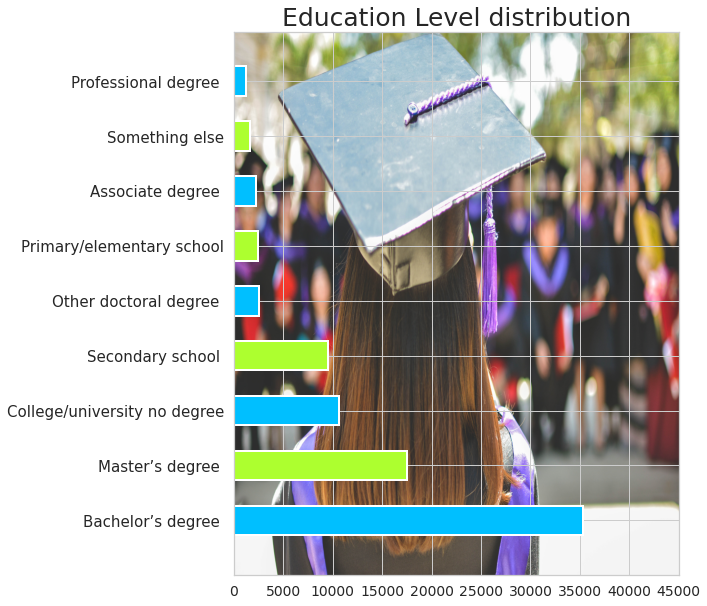

In [20]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12,10))
y_code = [50000*1/9,50000*2/9,50000*3/9,50000*4/9,50000*5/9,
          50000*6/9,50000*7/9,50000*8/9,50000*9/9]
ax.barh(width=df_ed["Count"], y=y_code, edgecolor = "white", linewidth=2,
         color=['deepskyblue', 'greenyellow'], height=3000)
plt.xticks(fontsize=14)
plt.yticks(y_code, df_ed["split_index"], fontsize=15)
plt.title("Education Level distribution", fontsize = 25)
img = plt.imread("../input/edu-unsplash/md-duran-1VqHRwxcCCw-unsplash.jpg")
plt.imshow(img, extent = [0,45000, 0,55000])
plt.show()

# Which online societies do respondents use?

In [21]:
df_site = df_response["NEWSOSites"].value_counts().reset_index(name="Count")
df_site

index  \
0                                                                                              Stack Overflow;Stack Exchange   
1                                                                                                             Stack Overflow   
2  Stack Overflow;Stack Exchange;Stack Overflow for Teams (private knowledge sharing & collaboration platform for companies)   
3                                                          I have never visited Stack Overflow or the Stack Exchange network   
4                 Stack Overflow;Stack Overflow for Teams (private knowledge sharing & collaboration platform for companies)   
5                                                                                                             Stack Exchange   
6                                Stack Overflow for Teams (private knowledge sharing & collaboration platform for companies)   
7                 Stack Exchange;Stack Overflow for Teams (private knowledge sharing & collaboration platform for companies)   

   Count  
0  54658  
1  23473  
2   3099  
3    750  
4    671  
5    257  
6    246  
7     17

In [22]:
df_site[['split_index', 'split_2']] = df_site['index'].str.split('(', n=1, expand=True)
df_site = df_site.drop(["split_2"], axis =1)

df_site.loc[0, "split_index"] = "Stack Overflow & Exchange"
df_site.loc[2, "split_index"] = "Overflow & Exchange & Overflow for Teams"
df_site.loc[3, "split_index"] = "Never visited"
df_site.loc[4, "split_index"] = "Stack Overflow & Overflow for Teams"
df_site.loc[7, "split_index"] = "Stack Exchange & Overflow for Teams"
df_site

index  \
0                                                                                              Stack Overflow;Stack Exchange   
1                                                                                                             Stack Overflow   
2  Stack Overflow;Stack Exchange;Stack Overflow for Teams (private knowledge sharing & collaboration platform for companies)   
3                                                          I have never visited Stack Overflow or the Stack Exchange network   
4                 Stack Overflow;Stack Overflow for Teams (private knowledge sharing & collaboration platform for companies)   
5                                                                                                             Stack Exchange   
6                                Stack Overflow for Teams (private knowledge sharing & collaboration platform for companies)   
7                 Stack Exchange;Stack Overflow for Teams (private knowledge sharing & collaboration platform for companies)   

   Count                               split_index  
0  54658                 Stack Overflow & Exchange  
1  23473                            Stack Overflow  
2   3099  Overflow & Exchange & Overflow for Teams  
3    750                             Never visited  
4    671       Stack Overflow & Overflow for Teams  
5    257                            Stack Exchange  
6    246                 Stack Overflow for Teams   
7     17       Stack Exchange & Overflow for Teams

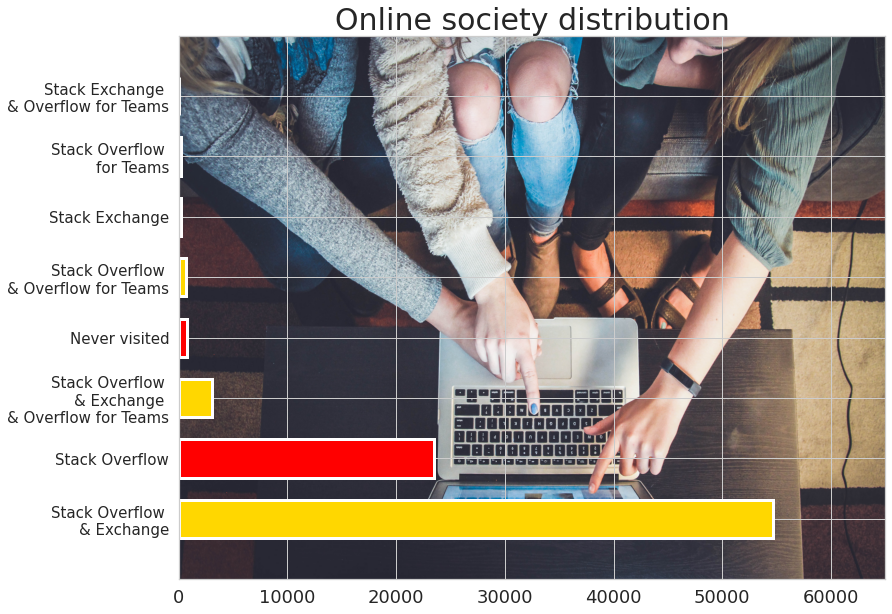

In [23]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(14,10))
y_code = [50000*1/9,50000*2/9,50000*3/9,50000*4/9,50000*5/9,
          50000*6/9,50000*7/9,50000*8/9]
ax.barh(width=df_site["Count"], y=y_code, edgecolor = "white", linewidth=3,
         color=['gold', 'red'], height=3500)
plt.xticks(fontsize=18)

# the variable names are long, so I customized them using "/n"
labels = ["Stack Overflow \n& Exchange", "Stack Overflow", 
          "Stack Overflow \n& Exchange \n& Overflow for Teams", "Never visited", 
          "Stack Overflow \n& Overflow for Teams", "Stack Exchange", 
          "Stack Overflow \nfor Teams", "Stack Exchange \n& Overflow for Teams",]
plt.yticks(y_code, labels, fontsize=15)

plt.title("Online society distribution", fontsize = 30)
img = plt.imread("../input/society-unsplash/john-schnobrich-2FPjlAyMQTA-unsplash.jpg")
plt.imshow(img, extent = [0,65000, 0,50000])
plt.show()

# **📯 Explore data according to main branch** 

**Main branch column have no null value and have only six indices. In this part, therefore, I use them as criterion: "Developer", "Student learning to code", "As part of work", "As a hobby", "Developer in past", "None of these".**

![learning_unsplash](https://images.unsplash.com/photo-1503676260728-1c00da094a0b?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1122&q=80)

# 1. Employment

In [24]:
# make daraframe which have count on the criterion

empl_developer = df_response[df_response["MainBranch"]==
            "I am a developer by profession"].groupby(
    df_response["Employment"]).size().reset_index(name="Developer")

empl_student = df_response[df_response["MainBranch"]==
            "I am a student who is learning to code"].groupby(
    df_response["Employment"]).size().reset_index(name="Student")

empl_part = df_response[df_response["MainBranch"]==
            "I am not primarily a developer, but I write code sometimes as part of my work"].groupby(
    df_response["Employment"]).size().reset_index(name="Part of work")
    
empl_hobby = df_response[df_response["MainBranch"]==
            "I code primarily as a hobby"].groupby(
    df_response["Employment"]).size().reset_index(name="Hobby")

empl_past = df_response[df_response["MainBranch"]==
            "I used to be a developer by profession, but no longer am"].groupby(
    df_response["Employment"]).size().reset_index(name="Developer in past")

empl_none = df_response[df_response["MainBranch"]==
            "None of these"].groupby(
    df_response["Employment"]).size().reset_index(name="None of these")

In [25]:
# merge the multiple columns

from functools import reduce

employment = [empl_developer, empl_student, empl_part, empl_hobby, 
              empl_past, empl_none]

employment = reduce(lambda  left,right: pd.merge(left,right,on=['Employment'],
                                            how='outer'), employment)
employment

Employment  Developer  Student  \
0                                    Employed full-time      46884      492   
1                                    Employed part-time       1637      367   
2                                   I prefer not to say        155      208   
3  Independent contractor, freelancer, or self-employed       6515      346   
4                Not employed, and not looking for work        161      348   
5                    Not employed, but looking for work        994     1212   
6                                               Retired         55       11   
7                                    Student, full-time       1230     7844   
8                                    Student, part-time        479     1181   

   Part of work  Hobby  Developer in past  None of these  
0          4758    610                709            131  
1           272    128                 33             24  
2            55    353                 22             97  
3           679    321                134             46  
4            30    608                 54             27  
5           173    420                 92             70  
6            21     99                117             23  
7           497   2074                 67             69  
8            87    282                  7             15

In [26]:
employment0 = employment[0:1]
employment1 = employment[1:2]
employment2 = employment[2:3]
employment3 = employment[3:4]
employment4 = employment[4:5]
employment5 = employment[5:6]
employment6 = employment[6:7]
employment7 = employment[7:8]
employment8 = employment[8:9]

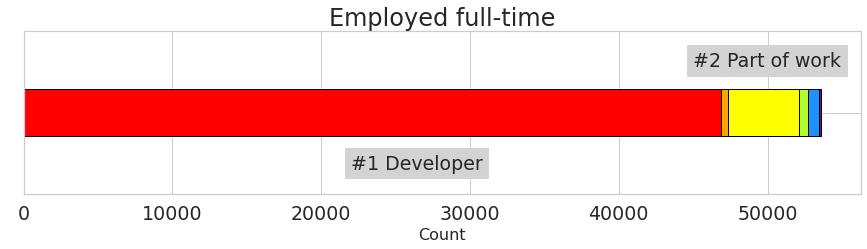

In [27]:
# make plot
employment0.plot.barh(figsize = (15,3), stacked = True, edgecolor='black',
                color = ['red','orange', 'yellow', 'greenyellow',
                        'dodgerblue', 'purple'], width = 0.2)

plt.xticks(fontsize = 19)
plt.xlabel("Count", fontsize = 16)

# not to appear yticks, I colored it "white"
plt.yticks(color = "white")
plt.ylabel("")
plt.title("Employed full-time", fontsize = 24)

# The current job index(top 2 most common)
plt.text(22000, -0.24, '#1 Developer', fontsize=19, bbox=dict(boxstyle='square', color='lightgray'))
plt.text(45000, 0.2, '#2 Part of work', fontsize=19, bbox=dict(boxstyle='square', color='lightgray'))
#remove legend
plt.legend([],[], frameon=False)

plt.show();

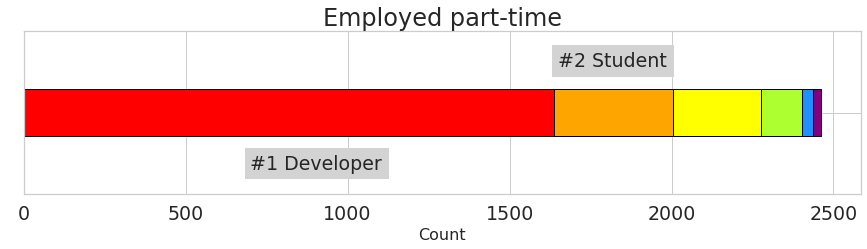

In [28]:
employment1.plot.barh(figsize = (15,3), stacked = True, edgecolor='black',
                color = ['red','orange', 'yellow', 'greenyellow',
                        'dodgerblue', 'purple'], width = 0.2)
plt.xticks(fontsize = 19)
plt.xlabel("Count", fontsize = 16)
plt.yticks(color = "white")
plt.ylabel("")
plt.title("Employed part-time", fontsize = 24)
plt.text(700, -0.24, '#1 Developer', fontsize=19, bbox=dict(boxstyle='square', color='lightgray'))
plt.text(1650, 0.2, '#2 Student', fontsize=19, bbox=dict(boxstyle='square', color='lightgray'))
plt.legend([],[], frameon=False)
plt.show();

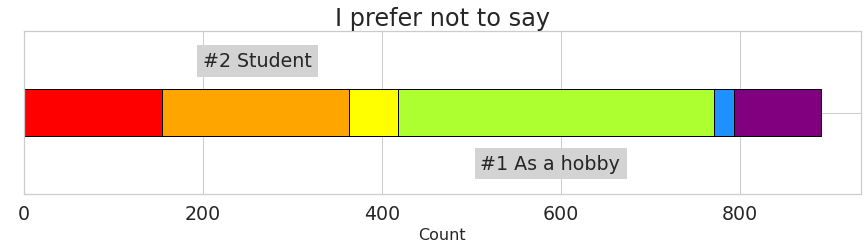

In [29]:
employment2.plot.barh(figsize = (15,3), stacked = True, edgecolor='black',
                color = ['red','orange', 'yellow', 'greenyellow',
                        'dodgerblue', 'purple'], width = 0.2)
plt.xticks(fontsize = 19)
plt.xlabel("Count", fontsize = 16)
plt.yticks(color = "white")
plt.ylabel("")
plt.title("I prefer not to say", fontsize = 24)
plt.text(510, -0.24, '#1 As a hobby', fontsize=19, bbox=dict(boxstyle='square', color='lightgray'))
plt.text(200, 0.2, '#2 Student', fontsize=19, bbox=dict(boxstyle='square', color='lightgray'))
plt.legend([],[], frameon=False)
plt.show();

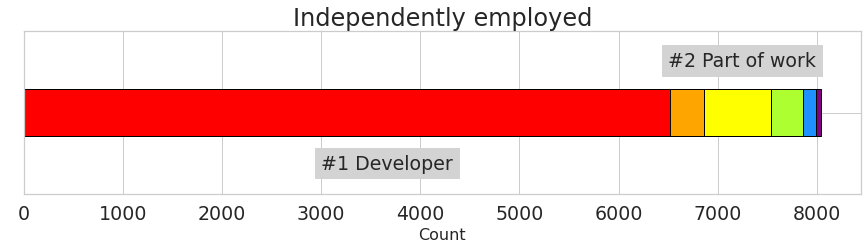

In [30]:
employment3.plot.barh(figsize = (15,3), stacked = True, edgecolor='black',
                color = ['red','orange', 'yellow', 'greenyellow',
                        'dodgerblue', 'purple'], width = 0.2)
plt.xticks(fontsize = 19)
plt.xlabel("Count", fontsize = 16)
plt.yticks(color = "white")
plt.ylabel("")
plt.title("Independently employed", fontsize = 24)
plt.text(3000, -0.24, '#1 Developer', fontsize=19, bbox=dict(boxstyle='square', color='lightgray'))
plt.text(6500, 0.2, '#2 Part of work', fontsize=19, bbox=dict(boxstyle='square', color='lightgray'))
plt.legend([],[], frameon=False)
plt.show();

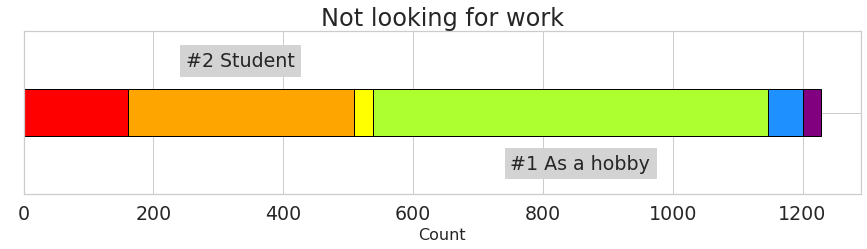

In [31]:
employment4.plot.barh(figsize = (15,3), stacked = True, edgecolor='black',
                color = ['red','orange', 'yellow', 'greenyellow',
                        'dodgerblue', 'purple'], width = 0.2)
plt.xticks(fontsize = 19)
plt.xlabel("Count", fontsize = 16)
plt.yticks(color = "white")
plt.ylabel("")
plt.title("Not looking for work", fontsize = 24)
plt.text(750, -0.24, '#1 As a hobby', fontsize=19, bbox=dict(boxstyle='square', color='lightgray'))
plt.text(250, 0.2, '#2 Student', fontsize=19, bbox=dict(boxstyle='square', color='lightgray'))
plt.legend([],[], frameon=False)
plt.show();

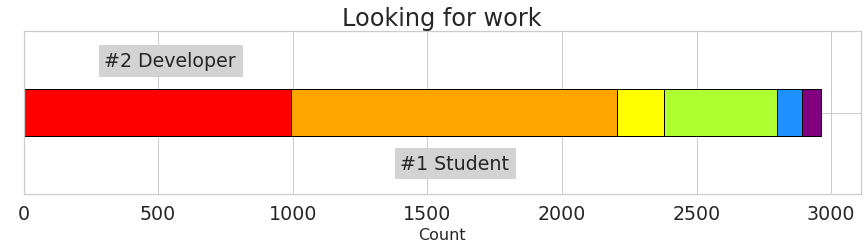

In [32]:
employment5.plot.barh(figsize = (15,3), stacked = True, edgecolor='black',
                color = ['red','orange', 'yellow', 'greenyellow',
                        'dodgerblue', 'purple'], width = 0.2)
plt.xticks(fontsize = 19)
plt.xlabel("Count", fontsize = 16)
plt.yticks(color = "white")
plt.ylabel("")
plt.title("Looking for work", fontsize = 24)
plt.text(1400, -0.24, '#1 Student', fontsize=19, bbox=dict(boxstyle='square', color='lightgray'))
plt.text(300, 0.2, '#2 Developer', fontsize=19, bbox=dict(boxstyle='square', color='lightgray'))
plt.legend([],[], frameon=False)
plt.show();

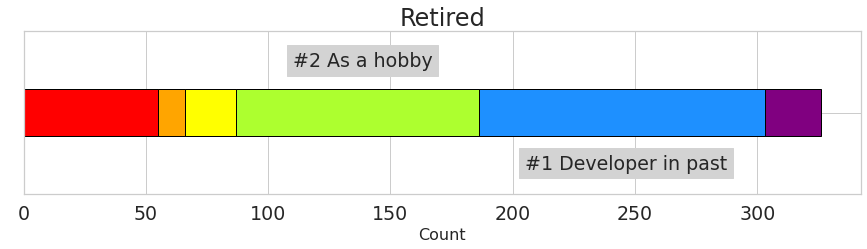

In [33]:
employment6.plot.barh(figsize = (15,3), stacked = True, edgecolor='black',
                color = ['red','orange', 'yellow', 'greenyellow',
                        'dodgerblue', 'purple'], width = 0.2)
plt.xticks(fontsize = 19)
plt.xlabel("Count", fontsize = 16)
plt.yticks(color = "white")
plt.ylabel("")
plt.title("Retired", fontsize = 24)
plt.text(205, -0.24, '#1 Developer in past', fontsize=19, bbox=dict(boxstyle='square', color='lightgray'))
plt.text(110, 0.2, '#2 As a hobby', fontsize=19, bbox=dict(boxstyle='square', color='lightgray'))
plt.legend([],[], frameon=False)
plt.show();

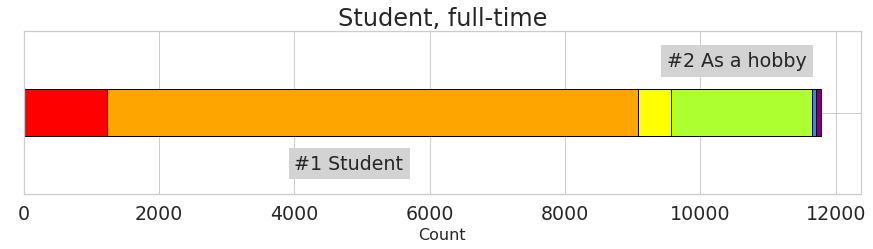

In [34]:
employment7.plot.barh(figsize = (15,3), stacked = True, edgecolor='black',
                color = ['red','orange', 'yellow', 'greenyellow',
                        'dodgerblue', 'purple'], width = 0.2)
plt.xticks(fontsize = 19)
plt.xlabel("Count", fontsize = 16)
plt.yticks(color = "white")
plt.ylabel("")
plt.title("Student, full-time", fontsize = 24)
plt.text(4000, -0.24, '#1 Student', fontsize=19, bbox=dict(boxstyle='square', color='lightgray'))
plt.text(9500, 0.2, '#2 As a hobby', fontsize=19, bbox=dict(boxstyle='square', color='lightgray'))
plt.legend([],[], frameon=False)
plt.show();

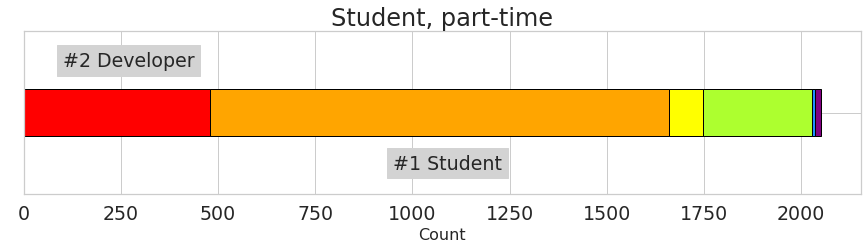

In [35]:
employment8.plot.barh(figsize = (15,3), stacked = True, edgecolor='black',
                color = ['red','orange', 'yellow', 'greenyellow',
                        'dodgerblue', 'purple'], width = 0.2)
plt.xticks(fontsize = 19)
plt.xlabel("Count", fontsize = 16)
plt.yticks(color = "white")
plt.ylabel("")
plt.title("Student, part-time", fontsize = 24)
plt.text(950, -0.24, '#1 Student', fontsize=19, bbox=dict(boxstyle='square', color='lightgray'))
plt.text(100, 0.2, '#2 Developer', fontsize=19, bbox=dict(boxstyle='square', color='lightgray'))
plt.legend([],[], frameon=False)
plt.show()

# 2. Age group

In [36]:
age_developer = df_response[df_response["MainBranch"]==
            "I am a developer by profession"].groupby(
    df_response["Age"]).size().reset_index(name="Developer")

age_student = df_response[df_response["MainBranch"]==
            "I am a student who is learning to code"].groupby(
    df_response["Age"]).size().reset_index(name="Student")

age_part = df_response[df_response["MainBranch"]==
            "I am not primarily a developer, but I write code sometimes as part of my work"].groupby(
    df_response["Age"]).size().reset_index(name="As part of work")
    
age_hobby = df_response[df_response["MainBranch"]==
            "I code primarily as a hobby"].groupby(
    df_response["Age"]).size().reset_index(name="As a hobby")

age_past = df_response[df_response["MainBranch"]==
            "I used to be a developer by profession, but no longer am"].groupby(
    df_response["Age"]).size().reset_index(name="Developer in past")

age_none = df_response[df_response["MainBranch"]==
            "None of these"].groupby(
    df_response["Age"]).size().reset_index(name="None of these")

In [37]:
age_group = [age_developer, age_student, age_part, age_hobby, 
              age_past, age_none]
age_group = reduce(lambda  left,right: pd.merge(left,right,on=['Age'],
                                            how='outer'), age_group)
age_group

Age  Developer  Student  As part of work  As a hobby  \
0     18-24 years old      10987     7684              960        1160   
1     25-34 years old      27874     1167             2554         513   
2     35-44 years old      12497      199             1739         304   
3     45-54 years old       4210       55              796         147   
4     55-64 years old       1294       15              278          91   
5   65 years or older        201        8               53          53   
6   Prefer not to say        188      112               62         167   
7  Under 18 years old        322     2597               53        2357   

   Developer in past  None of these  
0                100            102  
1                338            122  
2                354             90  
3                214             50  
4                112             29  
5                 83             23  
6                 16             30  
7                  6             41

In [38]:
# split rows
age0 = age_group[:1]
age1 = age_group[1:2]
age2 = age_group[2:3]
age3 = age_group[3:4]
age4 = age_group[4:5]
age5 = age_group[5:6]
age6 = age_group[6:7]
age7 = age_group[7:8]

In [39]:
# check again
df_age

index  Count
0     25-34 years old  32568
1     18-24 years old  20993
2     35-44 years old  15183
3     45-54 years old   5472
4  Under 18 years old   5376
5     55-64 years old   1819
6   Prefer not to say    575
7   65 years or older    421

In [40]:
# set colors
colors0 = ['red','white', 'white', 'white','white', 'white'] # developer
colors1 = ['white','orange', 'white', 'white','white', 'white'] # student
colors2 = ['white','white', 'yellow', 'white','white', 'white'] # part of work
colors3 = ['white','white', 'white', 'greenyellow','white', 'white'] # hobby
colors4 = ['white','white', 'white', 'white','dodgerblue', 'white'] # developer in past
colors5 = ['white','white', 'white', 'white', 'white', 'purple'] # none of these
# for total number
colors6 = ['lightgray','lightgray', 'lightgray', 'lightgray', 'lightgray', 'lightgray']

# make custom legend
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Developer')
orange_patch = mpatches.Patch(color='orange', label='Student')
yellow_patch = mpatches.Patch(color='yellow', label='As part of work')
greenyellow_patch = mpatches.Patch(color='greenyellow', label='As a hobby')
dodgerblue_patch = mpatches.Patch(color='dodgerblue', label='Developer in past')
purple_patch = mpatches.Patch(color='purple', label='None of these')

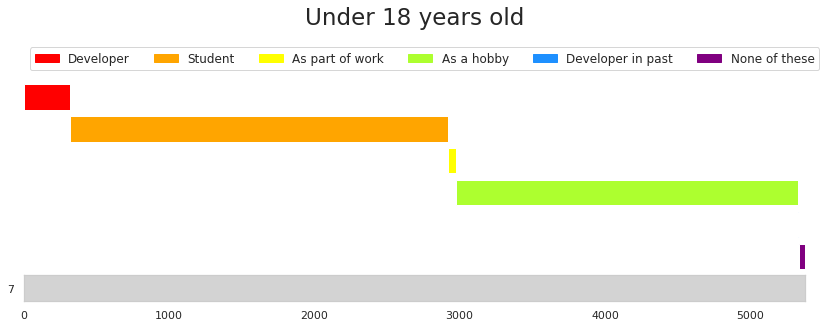

In [41]:
# make plot
fig = plt.figure(figsize = (14,4))

# make subplots
ax0 = fig.add_subplot(7,1,1)
age7.plot.barh(stacked = True, color = colors0, width = 10, ax=ax0)
ax1 = fig.add_subplot(7,1,2)
age7.plot.barh(stacked = True, color = colors1, width = 10, ax=ax1)
ax2 = fig.add_subplot(7,1,3)
age7.plot.barh(stacked = True, color = colors2, width = 10, ax=ax2)
ax3 = fig.add_subplot(7,1,4)
age7.plot.barh(stacked = True, color = colors3, width = 10, ax=ax3)
ax4 = fig.add_subplot(7,1,5)
age7.plot.barh(stacked = True, color = colors4, width = 10, ax=ax4)
ax5 = fig.add_subplot(7,1,6)
age7.plot.barh(stacked = True, color = colors5, width = 10, ax=ax5)
ax6 = fig.add_subplot(7,1,7)

# the total number bar
age7.plot.barh(stacked = True, color = colors6, width = 10, ax=ax6, 
               edgecolor = "lightgray")

# not to appear grid
ax0.grid(False)

# remove x,yticks
ax0.set_xticks([])
ax0.set_yticks([])

# set title
ax0.set_title("Under 18 years old\n\n", fontsize = 23)

# remove legend
ax0.legend([],[], frameon=False)
ax1.legend([],[], frameon=False)
ax2.legend([],[], frameon=False)
ax3.legend([],[], frameon=False)
ax4.legend([],[], frameon=False)
ax5.legend([],[], frameon=False)
ax6.legend(handles=[red_patch, orange_patch, yellow_patch, 
                   greenyellow_patch, dodgerblue_patch, purple_patch], 
           loc='lower left', ncol=len(age7.columns), 
           bbox_to_anchor=(0, 8.5), fontsize = 12)

ax0.axis("off")
ax1.axis("off")
ax2.axis("off")
ax3.axis("off")
ax4.axis("off")
ax5.axis("off")

ax0.set_xlim([0, 5376]) # 5376: the number of users who are 18-24 years old
ax1.set_xlim([0, 5376])
ax2.set_xlim([0, 5376])
ax3.set_xlim([0, 5376])
ax4.set_xlim([0, 5376])
ax5.set_xlim([0, 5376])
ax6.set_xlim([0, 5376])

plt.show();

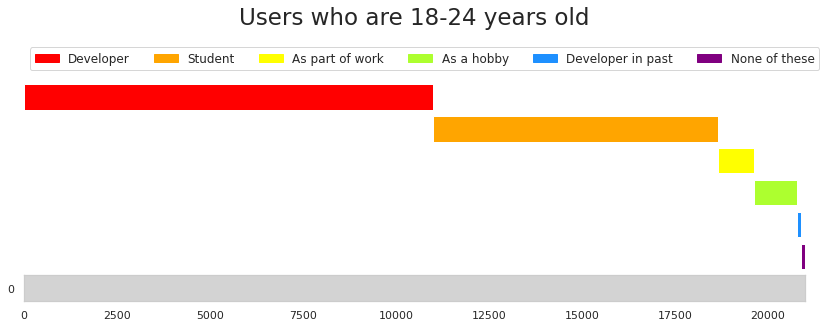

In [42]:
fig = plt.figure(figsize = (14,4))

ax0 = fig.add_subplot(7,1,1)
age0.plot.barh(stacked = True, color = colors0, width = 10, ax=ax0)
ax1 = fig.add_subplot(7,1,2)
age0.plot.barh(stacked = True, color = colors1, width = 10, ax=ax1)
ax2 = fig.add_subplot(7,1,3)
age0.plot.barh(stacked = True, color = colors2, width = 10, ax=ax2)
ax3 = fig.add_subplot(7,1,4)
age0.plot.barh(stacked = True, color = colors3, width = 10, ax=ax3)
ax4 = fig.add_subplot(7,1,5)
age0.plot.barh(stacked = True, color = colors4, width = 10, ax=ax4)
ax5 = fig.add_subplot(7,1,6)
age0.plot.barh(stacked = True, color = colors5, width = 10, ax=ax5)
ax6 = fig.add_subplot(7,1,7)
age0.plot.barh(stacked = True, color = colors6, width = 10, ax=ax6, 
               edgecolor = "lightgray")

ax0.grid(False)

ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_title("Users who are 18-24 years old\n\n", fontsize = 23)

ax0.legend([],[], frameon=False)
ax1.legend([],[], frameon=False)
ax2.legend([],[], frameon=False)
ax3.legend([],[], frameon=False)
ax4.legend([],[], frameon=False)
ax5.legend([],[], frameon=False)
ax6.legend(handles=[red_patch, orange_patch, yellow_patch, 
                   greenyellow_patch, dodgerblue_patch, purple_patch], 
           loc='lower left', ncol=len(age0.columns), 
           bbox_to_anchor=(0, 8.5), fontsize = 12)

ax0.axis("off")
ax1.axis("off")
ax2.axis("off")
ax3.axis("off")
ax4.axis("off")
ax5.axis("off")

ax0.set_xlim([0, 20993]) # 20993: the number of users who are 18-24 years old
ax1.set_xlim([0, 20993])
ax2.set_xlim([0, 20993])
ax3.set_xlim([0, 20993])
ax4.set_xlim([0, 20993])
ax5.set_xlim([0, 20993])
ax6.set_xlim([0, 20993])

plt.show();

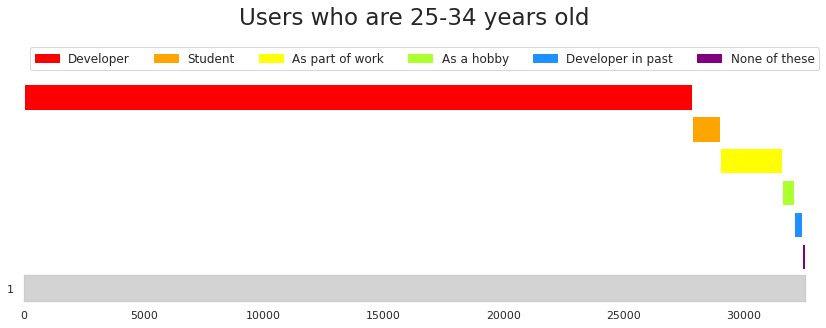

In [43]:
fig = plt.figure(figsize = (14,4))

ax0 = fig.add_subplot(7,1,1)
age1.plot.barh(stacked = True, color = colors0, width = 10, ax=ax0)
ax1 = fig.add_subplot(7,1,2)
age1.plot.barh(stacked = True, color = colors1, width = 10, ax=ax1)
ax2 = fig.add_subplot(7,1,3)
age1.plot.barh(stacked = True, color = colors2, width = 10, ax=ax2)
ax3 = fig.add_subplot(7,1,4)
age1.plot.barh(stacked = True, color = colors3, width = 10, ax=ax3)
ax4 = fig.add_subplot(7,1,5)
age1.plot.barh(stacked = True, color = colors4, width = 10, ax=ax4)
ax5 = fig.add_subplot(7,1,6)
age1.plot.barh(stacked = True, color = colors5, width = 10, ax=ax5)
ax6 = fig.add_subplot(7,1,7)
age1.plot.barh(stacked = True, color = colors6, width = 10, ax=ax6, 
               edgecolor = "lightgray")

ax0.grid(False)

ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_title("Users who are 25-34 years old\n\n", fontsize = 23)

ax0.legend([],[], frameon=False)
ax1.legend([],[], frameon=False)
ax2.legend([],[], frameon=False)
ax3.legend([],[], frameon=False)
ax4.legend([],[], frameon=False)
ax5.legend([],[], frameon=False)
ax6.legend(handles=[red_patch, orange_patch, yellow_patch, 
                   greenyellow_patch, dodgerblue_patch, purple_patch], 
           loc='lower left', ncol=len(age1.columns), 
           bbox_to_anchor=(0, 8.5), fontsize = 12)

ax0.axis("off")
ax1.axis("off")
ax2.axis("off")
ax3.axis("off")
ax4.axis("off")
ax5.axis("off")

ax0.set_xlim([0, 32568]) # 32568: the number of users who are 25-34 years old
ax1.set_xlim([0, 32568])
ax2.set_xlim([0, 32568])
ax3.set_xlim([0, 32568])
ax4.set_xlim([0, 32568])
ax5.set_xlim([0, 32568])
ax6.set_xlim([0, 32568])

plt.show();

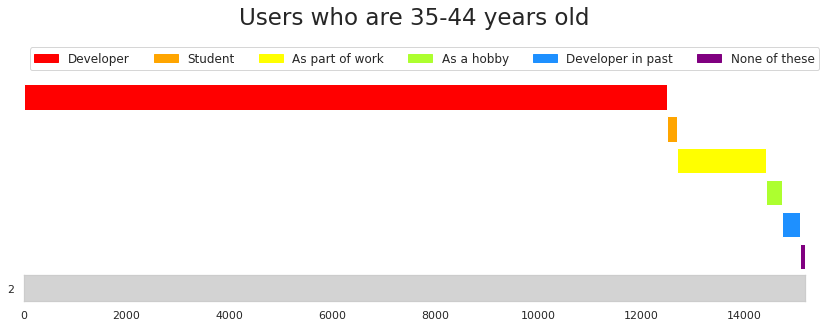

In [44]:
fig = plt.figure(figsize = (14,4))

ax0 = fig.add_subplot(7,1,1)
age2.plot.barh(stacked = True, color = colors0, width = 10, ax=ax0)
ax1 = fig.add_subplot(7,1,2)
age2.plot.barh(stacked = True, color = colors1, width = 10, ax=ax1)
ax2 = fig.add_subplot(7,1,3)
age2.plot.barh(stacked = True, color = colors2, width = 10, ax=ax2)
ax3 = fig.add_subplot(7,1,4)
age2.plot.barh(stacked = True, color = colors3, width = 10, ax=ax3)
ax4 = fig.add_subplot(7,1,5)
age2.plot.barh(stacked = True, color = colors4, width = 10, ax=ax4)
ax5 = fig.add_subplot(7,1,6)
age2.plot.barh(stacked = True, color = colors5, width = 10, ax=ax5)
ax6 = fig.add_subplot(7,1,7)
age2.plot.barh(stacked = True, color = colors6, width = 10, ax=ax6, 
               edgecolor = "lightgray")

ax0.grid(False)

ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_title("Users who are 35-44 years old\n\n", fontsize = 23)

ax0.legend([],[], frameon=False)
ax1.legend([],[], frameon=False)
ax2.legend([],[], frameon=False)
ax3.legend([],[], frameon=False)
ax4.legend([],[], frameon=False)
ax5.legend([],[], frameon=False)
ax6.legend(handles=[red_patch, orange_patch, yellow_patch, 
                   greenyellow_patch, dodgerblue_patch, purple_patch], 
           loc='lower left', ncol=len(age2.columns), 
           bbox_to_anchor=(0, 8.5), fontsize = 12)

ax0.axis("off")
ax1.axis("off")
ax2.axis("off")
ax3.axis("off")
ax4.axis("off")
ax5.axis("off")

ax0.set_xlim([0, 15183]) # 15183: the number of users who are 35-44 years old
ax1.set_xlim([0, 15183])
ax2.set_xlim([0, 15183])
ax3.set_xlim([0, 15183])
ax4.set_xlim([0, 15183])
ax5.set_xlim([0, 15183])
ax6.set_xlim([0, 15183])

plt.show();

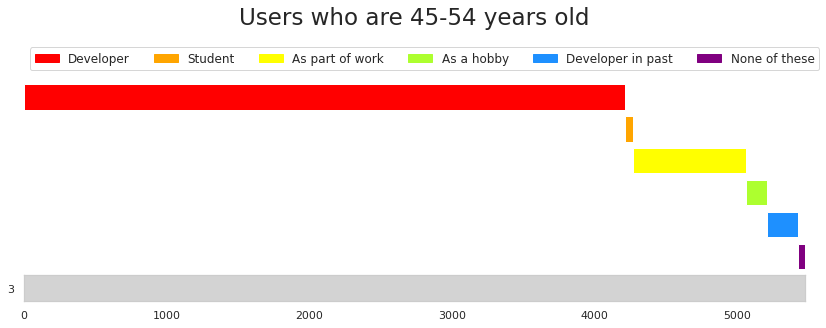

In [45]:
fig = plt.figure(figsize = (14,4))

ax0 = fig.add_subplot(7,1,1)
age3.plot.barh(stacked = True, color = colors0, width = 10, ax=ax0)
ax1 = fig.add_subplot(7,1,2)
age3.plot.barh(stacked = True, color = colors1, width = 10, ax=ax1)
ax2 = fig.add_subplot(7,1,3)
age3.plot.barh(stacked = True, color = colors2, width = 10, ax=ax2)
ax3 = fig.add_subplot(7,1,4)
age3.plot.barh(stacked = True, color = colors3, width = 10, ax=ax3)
ax4 = fig.add_subplot(7,1,5)
age3.plot.barh(stacked = True, color = colors4, width = 10, ax=ax4)
ax5 = fig.add_subplot(7,1,6)
age3.plot.barh(stacked = True, color = colors5, width = 10, ax=ax5)
ax6 = fig.add_subplot(7,1,7)
age3.plot.barh(stacked = True, color = colors6, width = 10, ax=ax6, 
               edgecolor = "lightgray")

ax0.grid(False)

ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_title("Users who are 45-54 years old\n\n", fontsize = 23)

ax0.legend([],[], frameon=False)
ax1.legend([],[], frameon=False)
ax2.legend([],[], frameon=False)
ax3.legend([],[], frameon=False)
ax4.legend([],[], frameon=False)
ax5.legend([],[], frameon=False)
ax6.legend(handles=[red_patch, orange_patch, yellow_patch, 
                   greenyellow_patch, dodgerblue_patch, purple_patch], 
           loc='lower left', ncol=len(age3.columns), 
           bbox_to_anchor=(0, 8.5), fontsize = 12)

ax0.axis("off")
ax1.axis("off")
ax2.axis("off")
ax3.axis("off")
ax4.axis("off")
ax5.axis("off")

ax0.set_xlim([0, 5472]) # 5472: the number of users who are 45-54 years old
ax1.set_xlim([0, 5472])
ax2.set_xlim([0, 5472])
ax3.set_xlim([0, 5472])
ax4.set_xlim([0, 5472])
ax5.set_xlim([0, 5472])
ax6.set_xlim([0, 5472])

plt.show();

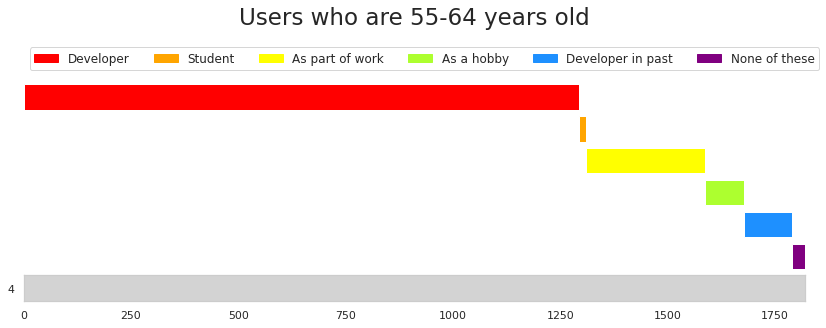

In [46]:
fig = plt.figure(figsize = (14,4))

ax0 = fig.add_subplot(7,1,1)
age4.plot.barh(stacked = True, color = colors0, width = 10, ax=ax0)
ax1 = fig.add_subplot(7,1,2)
age4.plot.barh(stacked = True, color = colors1, width = 10, ax=ax1)
ax2 = fig.add_subplot(7,1,3)
age4.plot.barh(stacked = True, color = colors2, width = 10, ax=ax2)
ax3 = fig.add_subplot(7,1,4)
age4.plot.barh(stacked = True, color = colors3, width = 10, ax=ax3)
ax4 = fig.add_subplot(7,1,5)
age4.plot.barh(stacked = True, color = colors4, width = 10, ax=ax4)
ax5 = fig.add_subplot(7,1,6)
age4.plot.barh(stacked = True, color = colors5, width = 10, ax=ax5)
ax6 = fig.add_subplot(7,1,7)
age4.plot.barh(stacked = True, color = colors6, width = 10, ax=ax6, 
               edgecolor = "lightgray")

ax0.grid(False)

ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_title("Users who are 55-64 years old\n\n", fontsize = 23)

ax0.legend([],[], frameon=False)
ax1.legend([],[], frameon=False)
ax2.legend([],[], frameon=False)
ax3.legend([],[], frameon=False)
ax4.legend([],[], frameon=False)
ax5.legend([],[], frameon=False)
ax6.legend(handles=[red_patch, orange_patch, yellow_patch, 
                   greenyellow_patch, dodgerblue_patch, purple_patch], 
           loc='lower left', ncol=len(age4.columns), 
           bbox_to_anchor=(0, 8.5), fontsize = 12)

ax0.axis("off")
ax1.axis("off")
ax2.axis("off")
ax3.axis("off")
ax4.axis("off")
ax5.axis("off")

ax0.set_xlim([0, 1819]) 
ax1.set_xlim([0, 1819])
ax2.set_xlim([0, 1819])
ax3.set_xlim([0, 1819])
ax4.set_xlim([0, 1819])
ax5.set_xlim([0, 1819])
ax6.set_xlim([0, 1819])

plt.show();

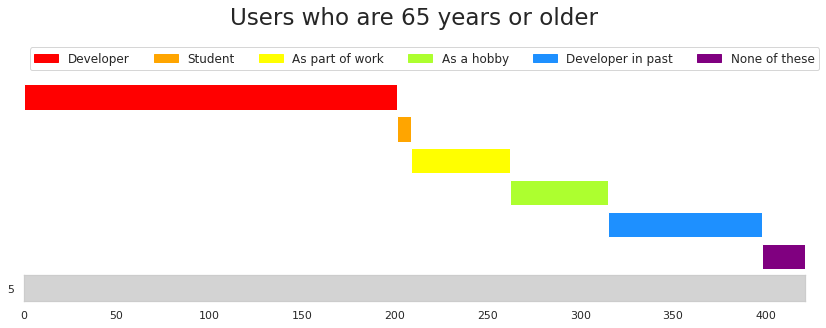

In [47]:
fig = plt.figure(figsize = (14,4))

ax0 = fig.add_subplot(7,1,1)
age5.plot.barh(stacked = True, color = colors0, width = 10, ax=ax0)
ax1 = fig.add_subplot(7,1,2)
age5.plot.barh(stacked = True, color = colors1, width = 10, ax=ax1)
ax2 = fig.add_subplot(7,1,3)
age5.plot.barh(stacked = True, color = colors2, width = 10, ax=ax2)
ax3 = fig.add_subplot(7,1,4)
age5.plot.barh(stacked = True, color = colors3, width = 10, ax=ax3)
ax4 = fig.add_subplot(7,1,5)
age5.plot.barh(stacked = True, color = colors4, width = 10, ax=ax4)
ax5 = fig.add_subplot(7,1,6)
age5.plot.barh(stacked = True, color = colors5, width = 10, ax=ax5)
ax6 = fig.add_subplot(7,1,7)
age5.plot.barh(stacked = True, color = colors6, width = 10, ax=ax6, 
               edgecolor = "lightgray")

ax0.grid(False)

ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_title("Users who are 65 years or older\n\n", fontsize = 23)

ax0.legend([],[], frameon=False)
ax1.legend([],[], frameon=False)
ax2.legend([],[], frameon=False)
ax3.legend([],[], frameon=False)
ax4.legend([],[], frameon=False)
ax5.legend([],[], frameon=False)
ax6.legend(handles=[red_patch, orange_patch, yellow_patch, 
                   greenyellow_patch, dodgerblue_patch, purple_patch], 
           loc='lower left', ncol=len(age5.columns), 
           bbox_to_anchor=(0, 8.5), fontsize = 12)

ax0.axis("off")
ax1.axis("off")
ax2.axis("off")
ax3.axis("off")
ax4.axis("off")
ax5.axis("off")

ax0.set_xlim([0, 421]) 
ax1.set_xlim([0, 421])
ax2.set_xlim([0, 421])
ax3.set_xlim([0, 421])
ax4.set_xlim([0, 421])
ax5.set_xlim([0, 421])
ax6.set_xlim([0, 421])

plt.show();

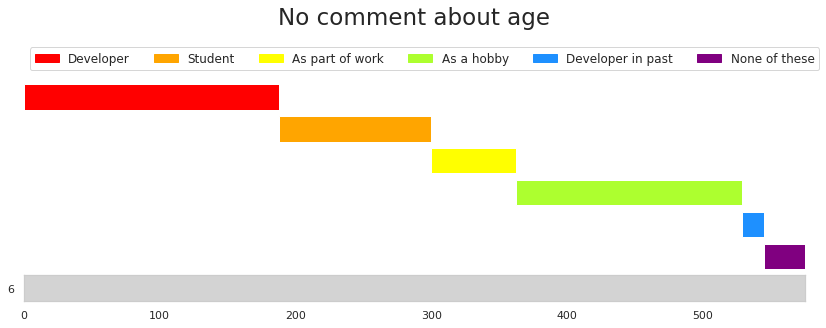

In [48]:
fig = plt.figure(figsize = (14,4))

ax0 = fig.add_subplot(7,1,1)
age6.plot.barh(stacked = True, color = colors0, width = 10, ax=ax0)
ax1 = fig.add_subplot(7,1,2)
age6.plot.barh(stacked = True, color = colors1, width = 10, ax=ax1)
ax2 = fig.add_subplot(7,1,3)
age6.plot.barh(stacked = True, color = colors2, width = 10, ax=ax2)
ax3 = fig.add_subplot(7,1,4)
age6.plot.barh(stacked = True, color = colors3, width = 10, ax=ax3)
ax4 = fig.add_subplot(7,1,5)
age6.plot.barh(stacked = True, color = colors4, width = 10, ax=ax4)
ax5 = fig.add_subplot(7,1,6)
age6.plot.barh(stacked = True, color = colors5, width = 10, ax=ax5)
ax6 = fig.add_subplot(7,1,7)
age6.plot.barh(stacked = True, color = colors6, width = 10, ax=ax6, 
               edgecolor = "lightgray")

ax0.grid(False)

ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_title("No comment about age\n\n", fontsize = 23)

ax0.legend([],[], frameon=False)
ax1.legend([],[], frameon=False)
ax2.legend([],[], frameon=False)
ax3.legend([],[], frameon=False)
ax4.legend([],[], frameon=False)
ax5.legend([],[], frameon=False)
ax6.legend(handles=[red_patch, orange_patch, yellow_patch, 
                   greenyellow_patch, dodgerblue_patch, purple_patch], 
           loc='lower left', ncol=len(age6.columns), 
           bbox_to_anchor=(0, 8.5), fontsize = 12)

ax0.axis("off")
ax1.axis("off")
ax2.axis("off")
ax3.axis("off")
ax4.axis("off")
ax5.axis("off")

ax0.set_xlim([0, 575])
ax1.set_xlim([0, 575])
ax2.set_xlim([0, 575])
ax3.set_xlim([0, 575])
ax4.set_xlim([0, 575])
ax5.set_xlim([0, 575])
ax6.set_xlim([0, 575])

plt.show();

# 3. Operating system

In [49]:
os_developer = df_response[df_response["MainBranch"]==
            "I am a developer by profession"].groupby(
    df_response["OperatingSystem"]).size().reset_index(name="Developer")

os_student = df_response[df_response["MainBranch"]==
            "I am a student who is learning to code"].groupby(
    df_response["OperatingSystem"]).size().reset_index(name="Student")

os_part = df_response[df_response["MainBranch"]==
            "I am not primarily a developer, but I write code sometimes as part of my work"].groupby(
    df_response["OperatingSystem"]).size().reset_index(name="Part of work")
    
os_hobby = df_response[df_response["MainBranch"]==
            "I code primarily as a hobby"].groupby(
    df_response["OperatingSystem"]).size().reset_index(name="Hobby")

os_past = df_response[df_response["MainBranch"]==
            "I used to be a developer by profession, but no longer am"].groupby(
    df_response["OperatingSystem"]).size().reset_index(name="Developer in past")

os_none = df_response[df_response["MainBranch"]==
            "None of these"].groupby(
    df_response["OperatingSystem"]).size().reset_index(name="None of these")

In [50]:
os = [os_developer, os_student, os_part, os_hobby, os_past, os_none]

os = reduce(lambda  left,right: pd.merge(left,right,on=['OperatingSystem'],
                                            how='outer'), os)
os

OperatingSystem  Developer  Student  Part of work  Hobby  \
0                                BSD         83       12            26     10   
1                        Linux-based      14615     2804          1932   1308   
2                              MacOS      17443     1238          1324    580   
3            Other (please specify):        260       95            64     85   
4                            Windows      23928     7344          3003   2745   
5  Windows Subsystem for Linux (WSL)       1745      514           222    192   

   Developer in past  None of these  
0                  7              8  
1                307            122  
2                321             78  
3                 20             51  
4                536            202  
5                 44             26

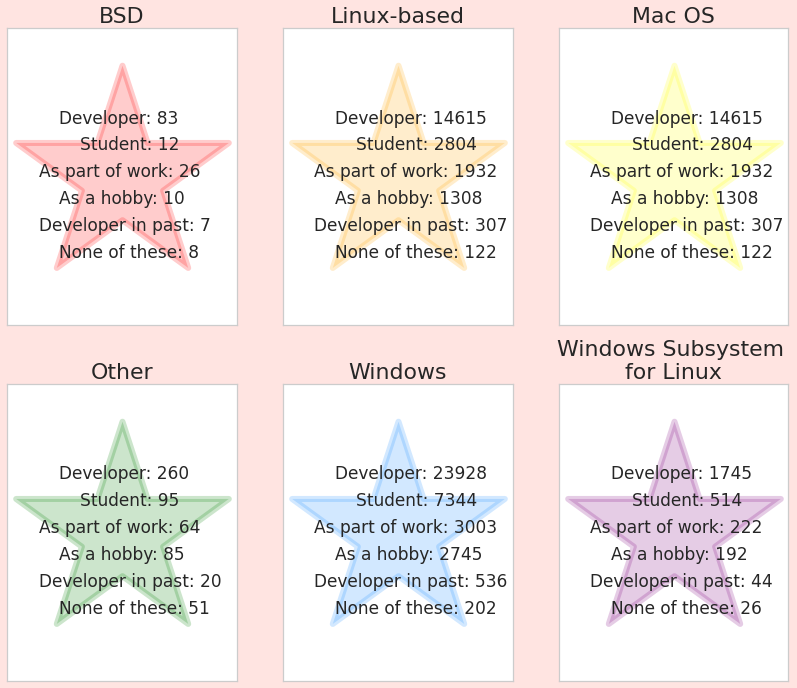

In [51]:
# make canvas
fig = plt.figure(figsize = (14,12))
fig.set_facecolor('mistyrose') 
x = [5]
y = [5]

# set subplot
ax0 = fig.add_subplot(2,3,1)
# set background
ax0.scatter(x, y, s=50000, c="red", alpha=0.2, linewidth=6, marker="*")
# write text with transparent text box
ax0.text(4.85,5.10, 'Developer: 83', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))
ax0.text(4.9,5.05, 'Student: 12', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))
ax0.text(4.8,5.0, 'As part of work: 26', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))
ax0.text(4.85,4.95, 'As a hobby: 10', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))
ax0.text(4.8,4.9, 'Developer in past: 7', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))
ax0.text(4.85,4.85, 'None of these: 8', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))

# repeat the process
ax1 = fig.add_subplot(2,3,2)
ax1.scatter(x, y, s=50000, c="orange", alpha=0.2, linewidth=6, marker="*")
ax1.text(4.85,5.10, 'Developer: 14615', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))
ax1.text(4.9,5.05, 'Student: 2804', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))
ax1.text(4.8,5.0, 'As part of work: 1932', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))
ax1.text(4.85,4.95, 'As a hobby: 1308', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))
ax1.text(4.8,4.9, 'Developer in past: 307', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))
ax1.text(4.85,4.85, 'None of these: 122', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))

ax2 = fig.add_subplot(2,3,3)
ax2.scatter(x, y, s=50000, c="yellow", alpha=0.2, linewidth=6, marker="*")
ax2.text(4.85,5.10, 'Developer: 14615', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))
ax2.text(4.9,5.05, 'Student: 2804', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))
ax2.text(4.8,5.0, 'As part of work: 1932', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))
ax2.text(4.85,4.95, 'As a hobby: 1308', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))
ax2.text(4.8,4.9, 'Developer in past: 307', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))
ax2.text(4.85,4.85, 'None of these: 122', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))

ax3 = fig.add_subplot(2,3,4)
ax3.scatter(x, y, s=50000, c="green", alpha=0.2, linewidth=6, marker="*")
ax3.text(4.85,5.10, 'Developer: 260', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))
ax3.text(4.9,5.05, 'Student: 95', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))
ax3.text(4.8,5.0, 'As part of work: 64', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))
ax3.text(4.85,4.95, 'As a hobby: 85', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))
ax3.text(4.8,4.9, 'Developer in past: 20', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))
ax3.text(4.85,4.85, 'None of these: 51', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))

ax4 = fig.add_subplot(2,3,5)
ax4.scatter(x, y, s=50000, c="dodgerblue", alpha=0.2, linewidth=6, marker="*")
ax4.text(4.85,5.10, 'Developer: 23928', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))
ax4.text(4.9,5.05, 'Student: 7344', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))
ax4.text(4.8,5.0, 'As part of work: 3003', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))
ax4.text(4.85,4.95, 'As a hobby: 2745', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))
ax4.text(4.8,4.9, 'Developer in past: 536', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))
ax4.text(4.85,4.85, 'None of these: 202', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))

ax5 = fig.add_subplot(2,3,6)
ax5.scatter(x, y, s=50000, c="purple", alpha=0.2, linewidth=6, marker="*")
ax5.text(4.85,5.10, 'Developer: 1745', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))
ax5.text(4.9,5.05, 'Student: 514', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))
ax5.text(4.8,5.0, 'As part of work: 222', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))
ax5.text(4.85,4.95, 'As a hobby: 192', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))
ax5.text(4.8,4.9, 'Developer in past: 44', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))
ax5.text(4.85,4.85, 'None of these: 26', fontsize=17, bbox=dict(boxstyle='square', color='white', alpha=0))

# remove grid, xticks, yticks
ax0.grid(False)
ax1.grid(False)
ax2.grid(False)
ax3.grid(False)
ax4.grid(False)
ax5.grid(False)
ax0.set_xticks([])
ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])
ax4.set_xticks([]) 
ax5.set_xticks([])
ax0.set_yticks([])
ax1.set_yticks([])
ax2.set_yticks([])
ax3.set_yticks([])
ax4.set_yticks([])
ax5.set_yticks([])

# set titles
ax0.set_title("BSD",fontsize =22)
ax1.set_title("Linux-based",fontsize =22)
ax2.set_title("Mac OS",fontsize =22)
ax3.set_title("Other",fontsize =22)
ax4.set_title("Windows",fontsize =22)
ax5.set_title("Windows Subsystem \nfor Linux",fontsize =22)

plt.show()

# 4. Educational background

In [52]:
ed_developer = df_response[df_response["MainBranch"]==
            "I am a developer by profession"].groupby(
    df_response["EdLevel"]).size().reset_index(name="Developer")

ed_student = df_response[df_response["MainBranch"]==
            "I am a student who is learning to code"].groupby(
    df_response["EdLevel"]).size().reset_index(name="Student")

ed_part = df_response[df_response["MainBranch"]==
            "I am not primarily a developer, but I write code sometimes as part of my work"].groupby(
    df_response["EdLevel"]).size().reset_index(name="Part of work")
    
ed_hobby = df_response[df_response["MainBranch"]==
            "I code primarily as a hobby"].groupby(
    df_response["EdLevel"]).size().reset_index(name="Hobby")

ed_past = df_response[df_response["MainBranch"]==
            "I used to be a developer by profession, but no longer am"].groupby(
    df_response["EdLevel"]).size().reset_index(name="Developer in past")

ed_none = df_response[df_response["MainBranch"]==
            "None of these"].groupby(
    df_response["EdLevel"]).size().reset_index(name="None of these")

In [53]:
ed_group = [ed_developer, ed_student, ed_part, ed_hobby, 
              ed_past, ed_none]
ed_group = reduce(lambda  left,right: pd.merge(left,right,on=['EdLevel'],
                                            how='outer'), ed_group)
ed_group = ed_group.set_index('EdLevel')
ed_group

Developer  \
EdLevel                                                                                         
Associate degree (A.A., A.S., etc.)                                                      1611   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                            28691   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                         14285   
Other doctoral degree (Ph.D., Ed.D., etc.)                                               1502   
Primary/elementary school                                                                 420   
Professional degree (JD, MD, etc.)                                                        947   
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)       2910   
Some college/university study without earning a degree                                   6941   
Something else                                                                            724   

                                                                                    Student  \
EdLevel                                                                                       
Associate degree (A.A., A.S., etc.)                                                     315   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                           3269   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                         551   
Other doctoral degree (Ph.D., Ed.D., etc.)                                               38   
Primary/elementary school                                                               917   
Professional degree (JD, MD, etc.)                                                       73   
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4318   
Some college/university study without earning a degree                                 2120   
Something else                                                                          358   

                                                                                    Part of work  \
EdLevel                                                                                            
Associate degree (A.A., A.S., etc.)                                                          166   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                                2230   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                             1960   
Other doctoral degree (Ph.D., Ed.D., etc.)                                                   857   
Primary/elementary school                                                                     65   
Professional degree (JD, MD, etc.)                                                           143   
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)           317   
Some college/university study without earning a degree                                       741   
Something else                                                                                85   

                                                                                    Hobby  \
EdLevel                                                                                     
Associate degree (A.A., A.S., etc.)                                                    80   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          585   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       273   
Other doctoral degree (Ph.D., Ed.D., etc.)                                             69   
Primary/elementary school                                                            1024   
Professional degree (JD, MD, etc.)                                                     63   
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)   1860   
Some college/university study wi

In [54]:
ed0 = ed_group[:1].to_dict('records')
print(ed0)
ed1 = ed_group[1:2].to_dict('records')
print(ed1)
ed2 = ed_group[2:3].to_dict('records')
print(ed2)
ed3 = ed_group[3:4].to_dict('records')
print(ed3)
ed4 = ed_group[4:5].to_dict('records')
print(ed4)
ed5 = ed_group[5:6].to_dict('records')
print(ed5)
ed6 = ed_group[6:7].to_dict('records')
print(ed6)
ed7 = ed_group[7:8].to_dict('records')
print(ed7)
ed8 = ed_group[8:9].to_dict('records')
print(ed8)

[{'Developer': 1611, 'Student': 315, 'Part of work': 166, 'Hobby': 80, 'Developer in past': 44, 'None of these': 15}]
[{'Developer': 28691, 'Student': 3269, 'Part of work': 2230, 'Hobby': 585, 'Developer in past': 466, 'None of these': 116}]
[{'Developer': 14285, 'Student': 551, 'Part of work': 1960, 'Hobby': 273, 'Developer in past': 376, 'None of these': 67}]
[{'Developer': 1502, 'Student': 38, 'Part of work': 857, 'Hobby': 69, 'Developer in past': 62, 'None of these': 39}]
[{'Developer': 420, 'Student': 917, 'Part of work': 65, 'Hobby': 1024, 'Developer in past': 15, 'None of these': 38}]
[{'Developer': 947, 'Student': 73, 'Part of work': 143, 'Hobby': 63, 'Developer in past': 21, 'None of these': 9}]
[{'Developer': 2910, 'Student': 4318, 'Part of work': 317, 'Hobby': 1860, 'Developer in past': 63, 'None of these': 66}]
[{'Developer': 6941, 'Student': 2120, 'Part of work': 741, 'Hobby': 564, 'Developer in past': 161, 'None of these': 62}]
[{'Developer': 724, 'Student': 358, 'Part of

In [55]:
!pip install pywaffle
from pywaffle import Waffle
# reference: https://pywaffle.readthedocs.io/en/latest/index.html

     |████████████████████████████████| 526 kB 274 kB/s 


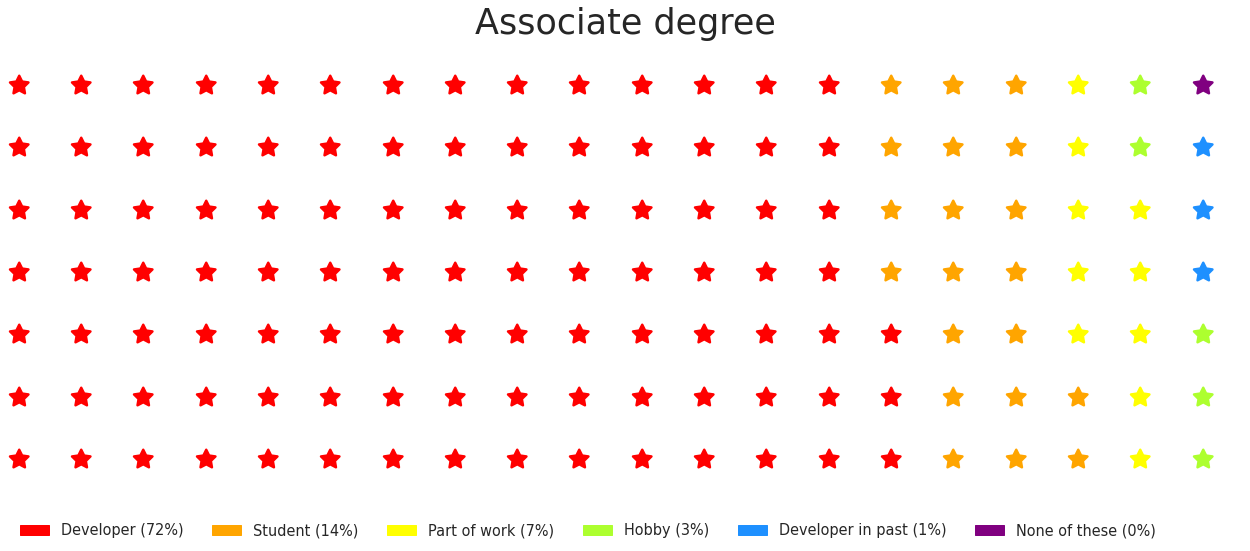

In [56]:
# dictinary style data - First: Associate degree(ed0)
data = {'Developer': 1611, 'Student': 315, 'Part of work': 166, 
        'Hobby': 80, 'Developer in past': 44, 'None of these': 15}

# make waffle plot
fig = plt.figure(figsize=(18, 8),
    FigureClass=Waffle,
    rows=7, columns=20, values=data,
    colors=["red", "orange", "yellow","greenyellow", "dodgerblue", "purple"],
    # icon shape *
    icons='star', 
    font_size=20,
    title={
        'label': 'Associate degree',
        'loc': 'center',
        'fontdict': {'fontsize': 35}},
    labels=[f"{k} ({int(v / sum(data.values()) * 100)}%)" for k, v in data.items()],
    legend={
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.2),
        'ncol': len(data),
        'framealpha': 0,
        'fontsize': 14.5
    })

fig.show()

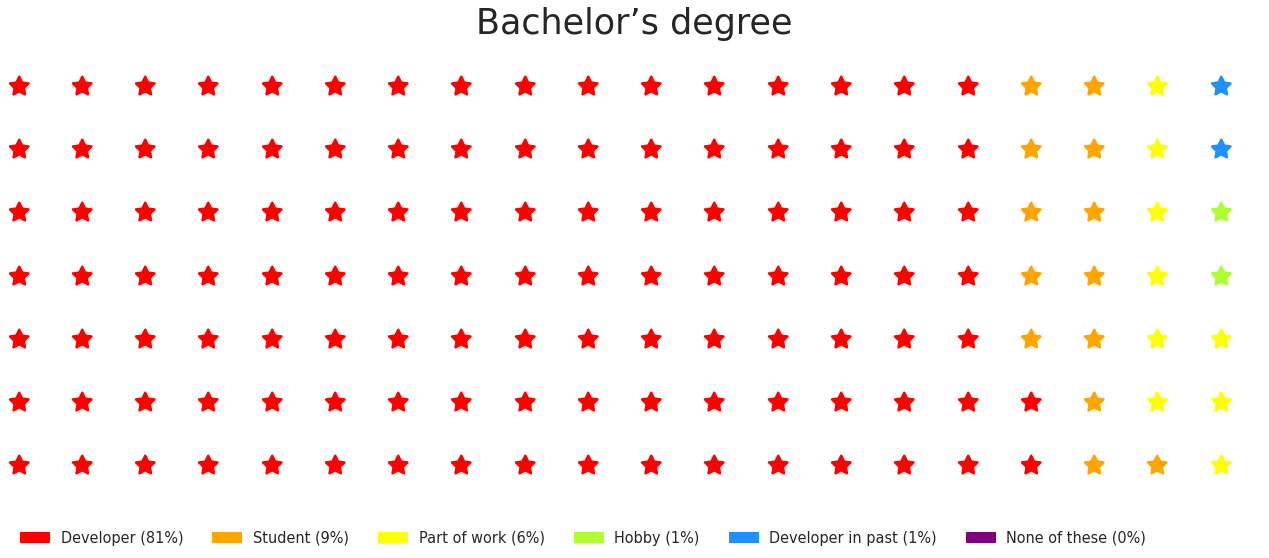

In [57]:
data = {'Developer': 28691, 'Student': 3269, 'Part of work': 2230, 
        'Hobby': 585, 'Developer in past': 466, 'None of these': 116}

fig = plt.figure(figsize=(18, 8),
    FigureClass=Waffle,
    rows=7, columns=20, values=data,
    colors=["red", "orange", "yellow","greenyellow", "dodgerblue", "purple"],
    icons='star', font_size=20,
    title={
        'label': 'Bachelor’s degree',
        'loc': 'center',
        'fontdict': {'fontsize': 35}},
    labels=[f"{k} ({int(v / sum(data.values()) * 100)}%)" for k, v in data.items()],
    legend={
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.2),
        'ncol': len(data),
        'framealpha': 0,
        'fontsize': 14.5
    })
fig.show()

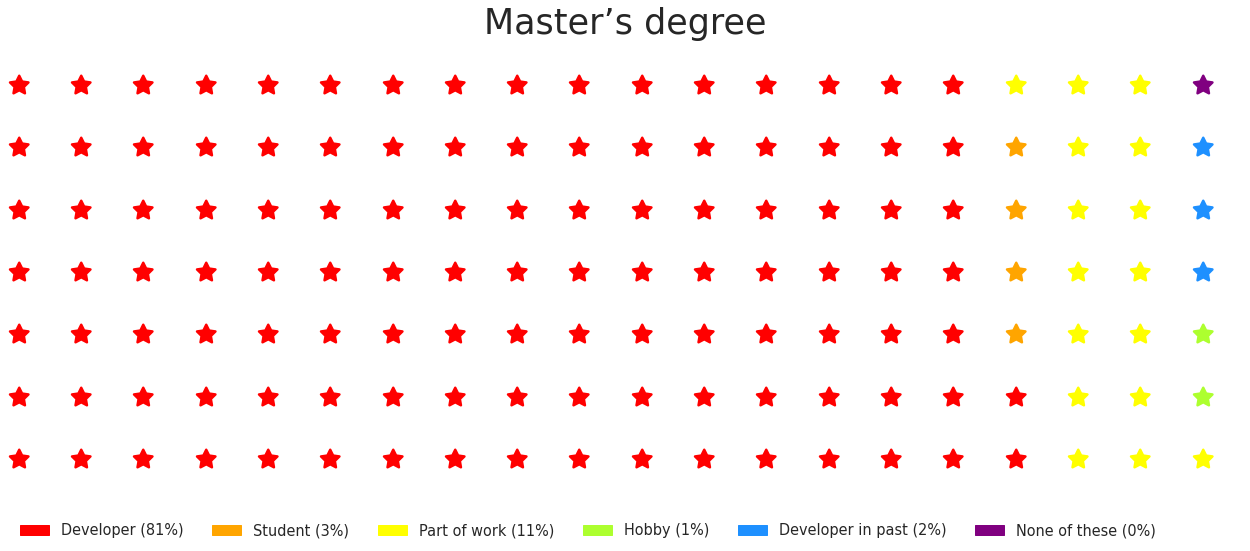

In [58]:
data = {'Developer': 14285, 'Student': 551, 'Part of work': 1960, 
        'Hobby': 273, 'Developer in past': 376, 'None of these': 67}

fig = plt.figure(figsize=(18, 8),
    FigureClass=Waffle,
    rows=7, columns=20, values=data,
    colors=["red", "orange", "yellow","greenyellow", "dodgerblue", "purple"],
    icons='star', font_size=20,
    title={
        'label': 'Master’s degree',
        'loc': 'center',
        'fontdict': {'fontsize': 35}},
    labels=[f"{k} ({int(v / sum(data.values()) * 100)}%)" for k, v in data.items()],
    legend={
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.2),
        'ncol': len(data),
        'framealpha': 0,
        'fontsize': 14.5
    })
fig.show()

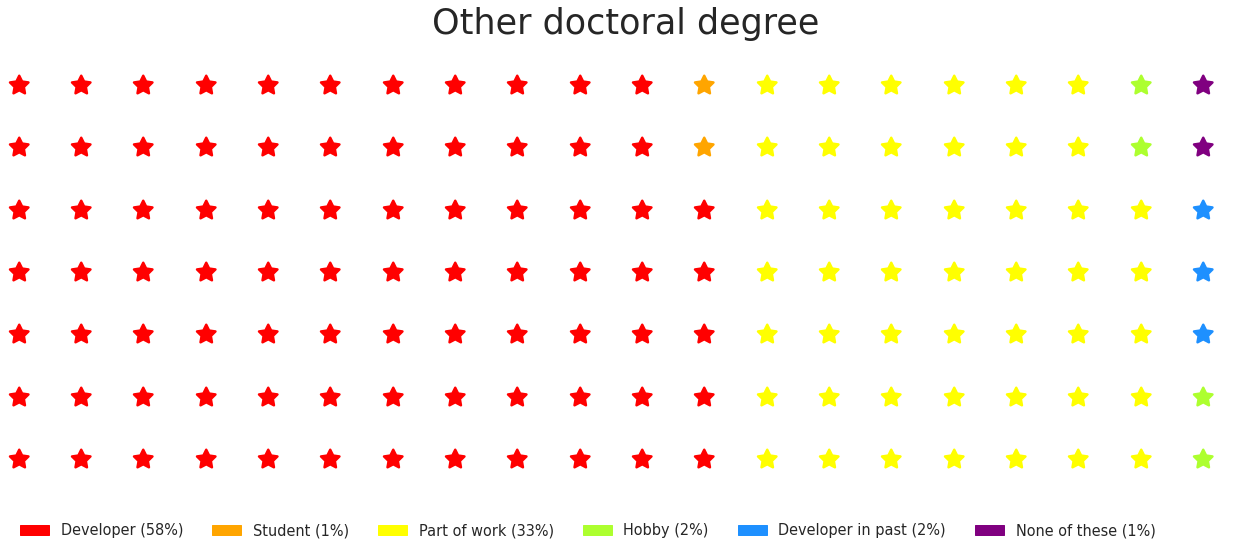

In [59]:
data = {'Developer': 1502, 'Student': 38, 'Part of work': 857, 
        'Hobby': 69, 'Developer in past': 62, 'None of these': 39}

fig = plt.figure(figsize=(18, 8),
    FigureClass=Waffle,
    rows=7, columns=20, values=data,
    colors=["red", "orange", "yellow","greenyellow", "dodgerblue", "purple"],
    icons='star', font_size=20,
    title={
        'label': 'Other doctoral degree',
        'loc': 'center',
        'fontdict': {'fontsize': 35}},
    labels=[f"{k} ({int(v / sum(data.values()) * 100)}%)" for k, v in data.items()],
    legend={
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.2),
        'ncol': len(data),
        'framealpha': 0,
        'fontsize': 14.5
    })
fig.show()

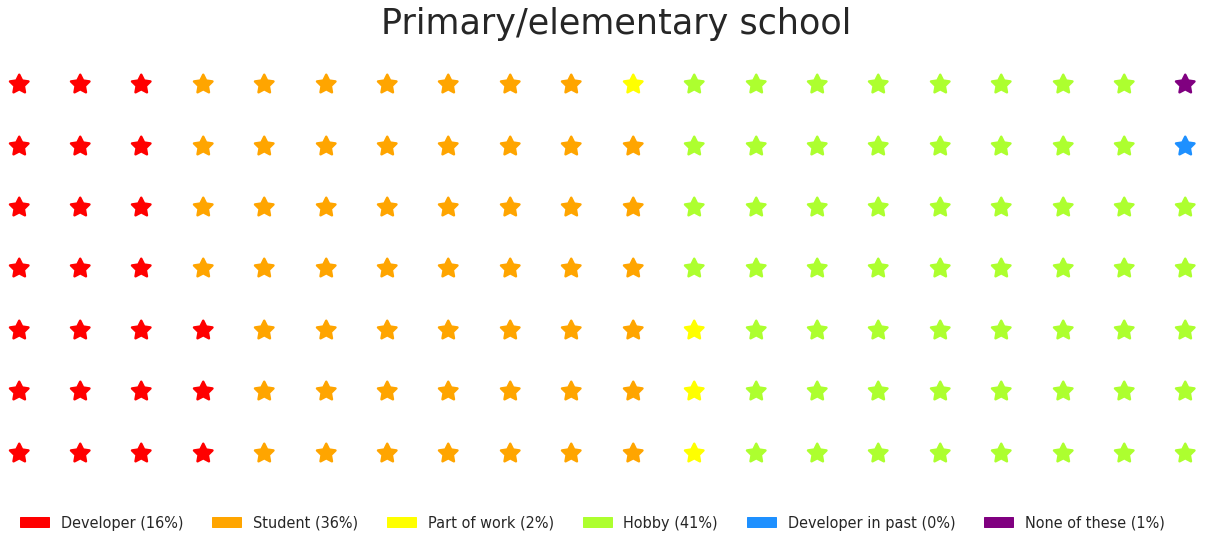

In [60]:
data = {'Developer': 420, 'Student': 917, 'Part of work': 65, 
        'Hobby': 1024, 'Developer in past': 15, 'None of these': 38}

fig = plt.figure(figsize=(18, 8),
    FigureClass=Waffle,
    rows=7, columns=20, values=data,
    colors=["red", "orange", "yellow","greenyellow", "dodgerblue", "purple"],
    icons='star', font_size=20,
    title={
        'label': 'Primary/elementary school',
        'loc': 'center',
        'fontdict': {'fontsize': 35}},
    labels=[f"{k} ({int(v / sum(data.values()) * 100)}%)" for k, v in data.items()],
    legend={
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.2),
        'ncol': len(data),
        'framealpha': 0,
        'fontsize': 14.5
    })
fig.show()

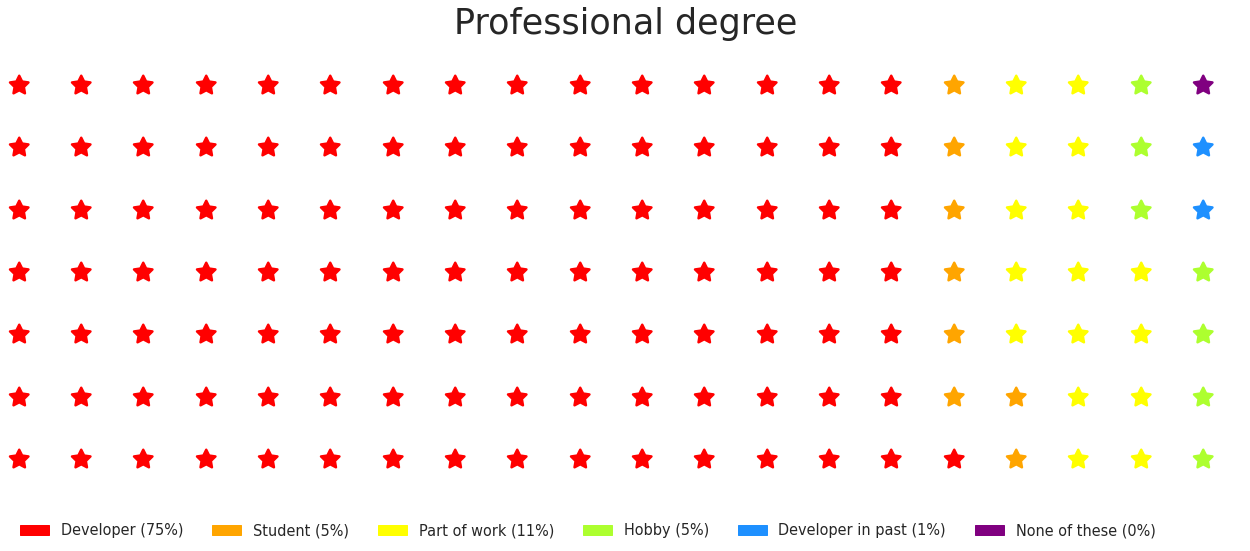

In [61]:
data = {'Developer': 947, 'Student': 73, 'Part of work': 143, 
        'Hobby': 63, 'Developer in past': 21, 'None of these': 9}

fig = plt.figure(figsize=(18, 8),
    FigureClass=Waffle,
    rows=7, columns=20, values=data,
    colors=["red", "orange", "yellow","greenyellow", "dodgerblue", "purple"],
    icons='star', font_size=20,
    title={
        'label': 'Professional degree',
        'loc': 'center',
        'fontdict': {'fontsize': 35}},
    labels=[f"{k} ({int(v / sum(data.values()) * 100)}%)" for k, v in data.items()],
    legend={
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.2),
        'ncol': len(data),
        'framealpha': 0,
        'fontsize': 14.5
    })
fig.show()

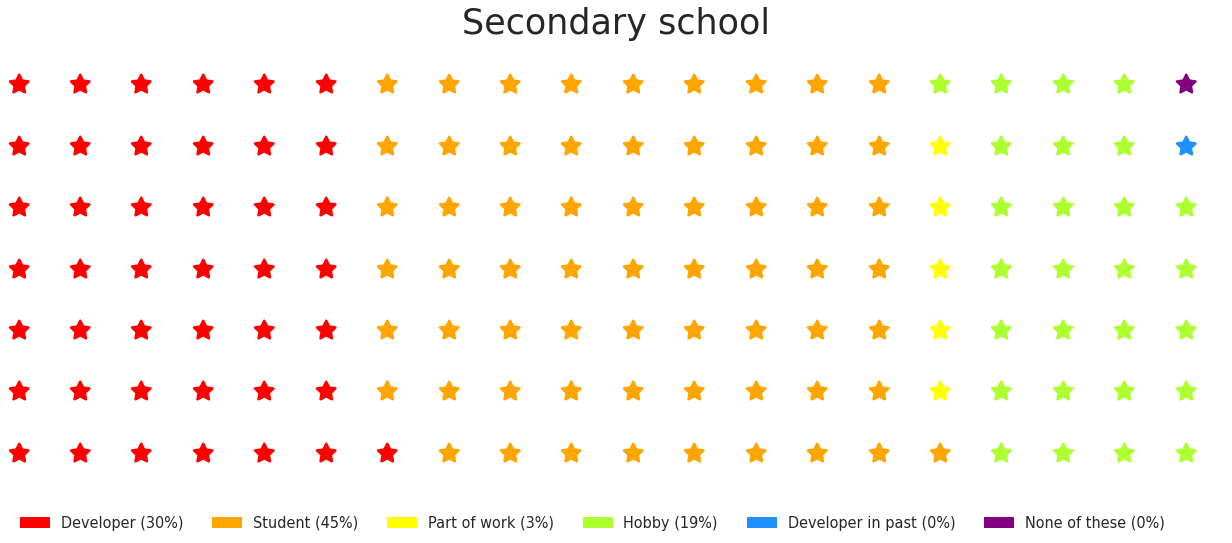

In [62]:
data = {'Developer': 2910, 'Student': 4318, 'Part of work': 317, 
        'Hobby': 1860, 'Developer in past': 63, 'None of these': 66}

fig = plt.figure(figsize=(18, 8),
    FigureClass=Waffle,
    rows=7, columns=20, values=data,
    colors=["red", "orange", "yellow","greenyellow", "dodgerblue", "purple"],
    icons='star', font_size=20,
    title={
        'label': 'Secondary school',
        'loc': 'center',
        'fontdict': {'fontsize': 35}},
    labels=[f"{k} ({int(v / sum(data.values()) * 100)}%)" for k, v in data.items()],
    legend={
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.2),
        'ncol': len(data),
        'framealpha': 0,
        'fontsize': 14.5
    })
fig.show()

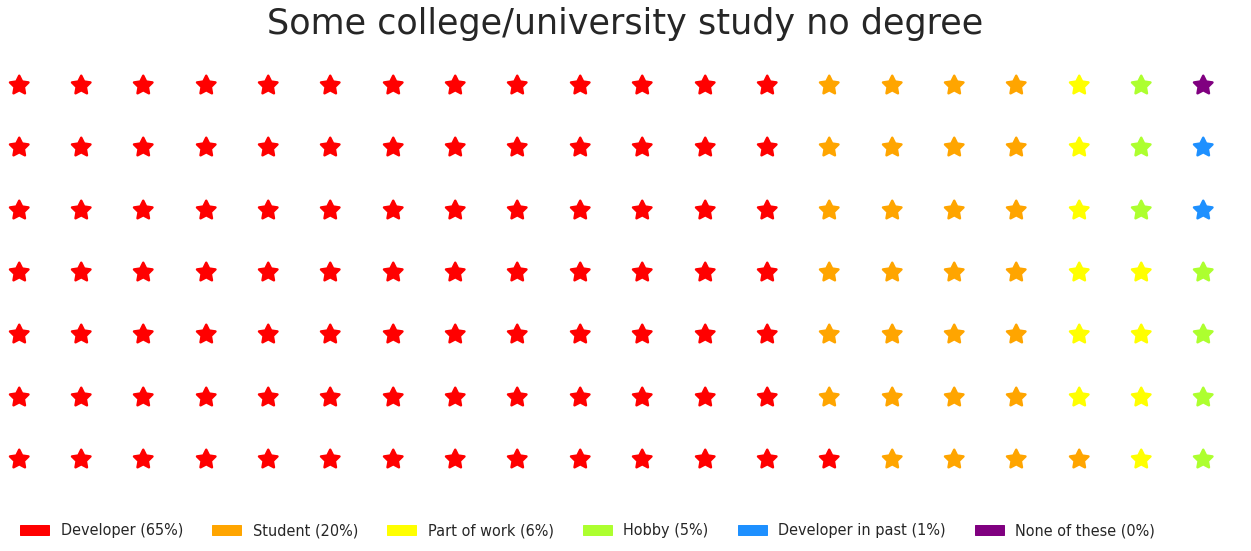

In [63]:
data = {'Developer': 6941, 'Student': 2120, 'Part of work': 741, 
       'Hobby': 564, 'Developer in past': 161, 'None of these': 62}

fig = plt.figure(figsize=(18, 8),
    FigureClass=Waffle,
    rows=7, columns=20, values=data,
    colors=["red", "orange", "yellow","greenyellow", "dodgerblue", "purple"],
    icons='star', font_size=20,
    title={
        'label': 'Some college/university study no degree',
        'loc': 'center',
        'fontdict': {'fontsize': 35}},
    labels=[f"{k} ({int(v / sum(data.values()) * 100)}%)" for k, v in data.items()],
    legend={
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.2),
        'ncol': len(data),
        'framealpha': 0,
        'fontsize': 14.5
    })
fig.show()

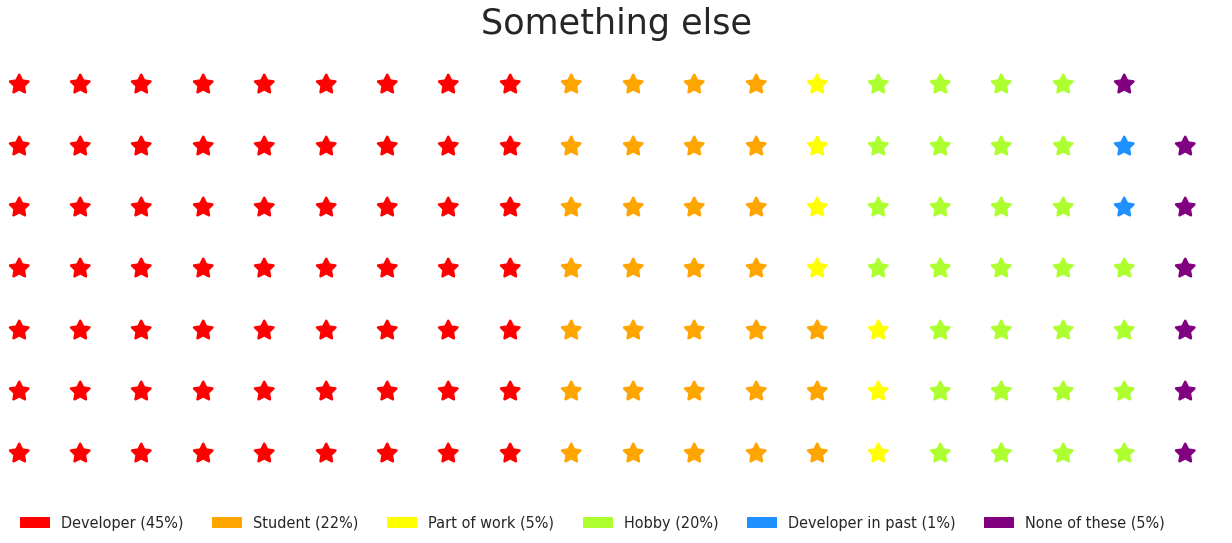

In [64]:
data = {'Developer': 724, 'Student': 358, 'Part of work': 85, 
        'Hobby': 328, 'Developer in past': 25, 'None of these': 81}

fig = plt.figure(figsize=(18, 8),
    FigureClass=Waffle,
    rows=7, columns=20, values=data,
    colors=["red", "orange", "yellow","greenyellow", "dodgerblue", "purple"],
    icons='star', font_size=20,
    title={
        'label': 'Something else',
        'loc': 'center',
        'fontdict': {'fontsize': 35}},
    labels=[f"{k} ({int(v / sum(data.values()) * 100)}%)" for k, v in data.items()],
    legend={
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.2),
        'ncol': len(data),
        'framealpha': 0,
        'fontsize': 14.5
    })
fig.show()

# 5. Online society

In [65]:
onso_developer = df_response[df_response["MainBranch"]==
            "I am a developer by profession"].groupby(
    df_response["NEWSOSites"]).size().reset_index(name="Developer")

onso_student = df_response[df_response["MainBranch"]==
            "I am a student who is learning to code"].groupby(
    df_response["NEWSOSites"]).size().reset_index(name="Student")

onso_part = df_response[df_response["MainBranch"]==
            "I am not primarily a developer, but I write code sometimes as part of my work"].groupby(
    df_response["NEWSOSites"]).size().reset_index(name="Part of work")
    
onso_hobby = df_response[df_response["MainBranch"]==
            "I code primarily as a hobby"].groupby(
    df_response["NEWSOSites"]).size().reset_index(name="Hobby")

onso_past = df_response[df_response["MainBranch"]==
            "I used to be a developer by profession, but no longer am"].groupby(
    df_response["NEWSOSites"]).size().reset_index(name="Developer in past")

onso_none = df_response[df_response["MainBranch"]==
            "None of these"].groupby(
    df_response["NEWSOSites"]).size().reset_index(name="None of these")

In [66]:
onso = [onso_developer, onso_student, onso_part, 
        onso_hobby, onso_past, onso_none]

onso = reduce(lambda  left,right: pd.merge(left,right,on=['NEWSOSites'],
                                            how='outer'), onso)
onso

NEWSOSites  \
0                                                          I have never visited Stack Overflow or the Stack Exchange network   
1                                                                                                             Stack Exchange   
2                 Stack Exchange;Stack Overflow for Teams (private knowledge sharing & collaboration platform for companies)   
3                                                                                                             Stack Overflow   
4                                Stack Overflow for Teams (private knowledge sharing & collaboration platform for companies)   
5                                                                                              Stack Overflow;Stack Exchange   
6  Stack Overflow;Stack Exchange;Stack Overflow for Teams (private knowledge sharing & collaboration platform for companies)   
7                 Stack Overflow;Stack Overflow for Teams (private knowledge sharing & collaboration platform for companies)   

   Developer  Student  Part of work   Hobby  Developer in past  None of these  
0        148      345            47    75.0                 28            107  
1         95       56            38    37.0                 13             18  
2          7        5             2     NaN                  2              1  
3      15905     3992          1718  1368.0                371            119  
4        142       48            19    13.0                  3             21  
5      38754     7158          4476  3312.0                762            196  
6       2455      278           205    89.0                 45             27  
7        503       96            47    12.0                 11              2

In [67]:
# install mplcyberpunk to make Neon plot
!pip install mplcyberpunk
import mplcyberpunk

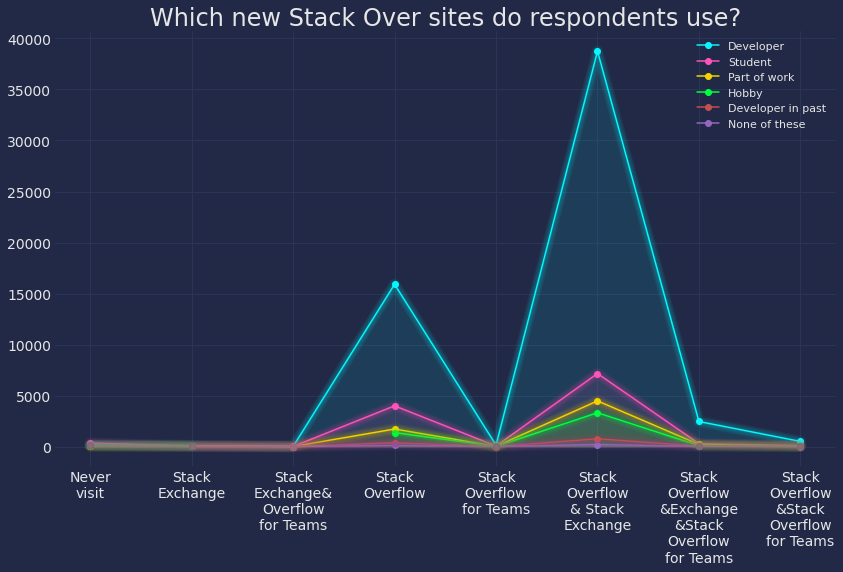

In [68]:
# set neon style
plt.style.use("cyberpunk")

labels = list(onso["NEWSOSites"])
xlabels = ["Never\nvisit", "Stack\nExchange", "Stack\nExchange&\nOverflow\nfor Teams",
          'Stack\nOverflow', 'Stack\nOverflow\nfor Teams', 
           "Stack\nOverflow\n& Stack\nExchange", 
           "Stack\nOverflow\n&Exchange\n&Stack\nOverflow\nfor Teams",
           "Stack\nOverflow\n&Stack\nOverflow\nfor Teams"]
x_code = [0,1,2,3,4,5,6,7]
fig, ax = plt.subplots(figsize=(14,8))
onso.plot(marker='o', label = labels, ax=ax)
mplcyberpunk.make_lines_glow(ax)
mplcyberpunk.add_underglow(ax)
plt.xticks(x_code, xlabels, fontsize = 14)
plt.yticks(fontsize = 14)
plt.title("Which new Stack Over sites do respondents use?", fontsize=24)
plt.show()

**🎤 Wait! This plot does not show 'Never visit','Stack Exchange' and 'Stack Overflow & Stack Overflow for teams' values because the number of counts are very small. I don't want to miss them. Let's go to explore them!**

In [69]:
onso = onso.T
onso.rename(columns  =onso.iloc[0], inplace = True)
onso = onso.drop(onso.index[0])
onso

I have never visited Stack Overflow or the Stack Exchange network  \
Developer                                                                       148   
Student                                                                         345   
Part of work                                                                     47   
Hobby                                                                          75.0   
Developer in past                                                                28   
None of these                                                                   107   

                  Stack Exchange  \
Developer                     95   
Student                       56   
Part of work                  38   
Hobby                       37.0   
Developer in past             13   
None of these                 18   

                  Stack Exchange;Stack Overflow for Teams (private knowledge sharing & collaboration platform for companies)  \
Developer                                                                                                                  7   
Student                                                                                                                    5   
Part of work                                                                                                               2   
Hobby                                                                                                                    NaN   
Developer in past                                                                                                          2   
None of these                                                                                                              1   

                  Stack Overflow  \
Developer                  15905   
Student                     3992   
Part of work                1718   
Hobby                     1368.0   
Developer in past            371   
None of these                119   

                  Stack Overflow for Teams (private knowledge sharing & collaboration platform for companies)  \
Developer                                                                                                 142   
Student                                                                                                    48   
Part of work                                                                                               19   
Hobby                                                                                                    13.0   
Developer in past                                                                                           3   
None of these                                                                                              21   

                  Stack Overflow;Stack Exchange  \
Developer                                 38754   
Student                                    7158   
Part of work                               4476   
Hobby                                    3312.0   
Developer in past                           762   
None of these                               196   

                  Stack Overflow;Stack Exchange;Stack Overflow for Teams (private knowledge sharing & collaboration platform for companies)  \
Developer                                                                                                                              2455   
Student                                                                                                                                 278   
Part of work                                                                                                                            205   
Hobby                                                                                                                                  89.0   
Developer in past                                                                                                                        45 

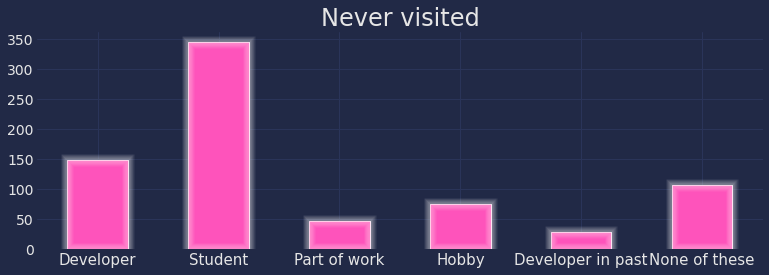

In [70]:
# set neon style
plt.style.use("cyberpunk")

fig, ax = plt.subplots(figsize=(13,4))
onso.iloc[:,[0]].plot(kind='bar', ax=ax, color = "#FE53BB")

# make neon edgeline
n_lines = 10
diff_linewidth = 1.05
alpha_value = 0.05
for n in range(1, n_lines+1):
    onso.iloc[:,[0]].plot(kind='bar',
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            legend=False,
            ax=ax, color="#FE53BB")

plt.xticks(fontsize = 15, rotation = 0)
plt.yticks(fontsize = 14)
plt.title("Never visited", fontsize=24)
plt.legend([])
plt.show()

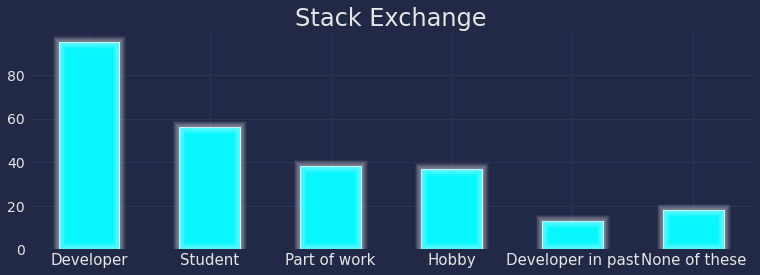

In [71]:
plt.style.use("cyberpunk")

fig, ax = plt.subplots(figsize=(13,4))
onso.iloc[:,[1]].plot(kind='bar', ax=ax, color = "#08F7FE")
n_lines = 10
diff_linewidth = 1.05
alpha_value = 0.05
for n in range(1, n_lines+1):
    onso.iloc[:,[1]].plot(kind='bar',
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            legend=False,
            ax=ax, color="#08F7FE")
plt.xticks(fontsize = 15, rotation = 0)
plt.yticks(fontsize = 14)
plt.title("Stack Exchange", fontsize=24)
plt.legend([])
plt.show()

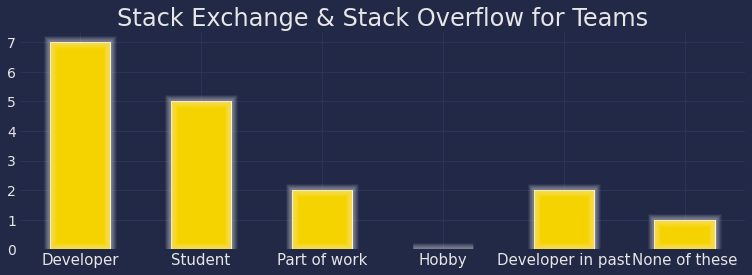

In [72]:
plt.style.use("cyberpunk")

fig, ax = plt.subplots(figsize=(13,4))
onso.iloc[:,[2]].plot(kind='bar', ax=ax, color = "#F5D300")
n_lines = 10
diff_linewidth = 1.05
alpha_value = 0.05
for n in range(1, n_lines+1):
    onso.iloc[:,[2]].plot(kind='bar',
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            legend=False,
            ax=ax, color="#F5D300")
plt.xticks(fontsize = 15, rotation = 0)
plt.yticks(fontsize = 14)
plt.title("Stack Exchange & Stack Overflow for Teams", fontsize=24)
plt.legend([])
plt.show()

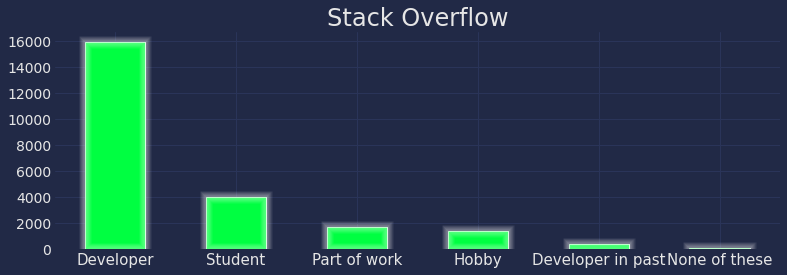

In [73]:
plt.style.use("cyberpunk")

fig, ax = plt.subplots(figsize=(13,4))
onso.iloc[:,[3]].plot(kind='bar', ax=ax, color = "#00ff41")
n_lines = 10
diff_linewidth = 1.05
alpha_value = 0.05
for n in range(1, n_lines+1):
    onso.iloc[:,[3]].plot(kind='bar',
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            legend=False,
            ax=ax, color="#00ff41")
plt.xticks(fontsize = 15, rotation = 0)
plt.yticks(fontsize = 14)
plt.title("Stack Overflow", fontsize=24)
plt.legend([])
plt.show()

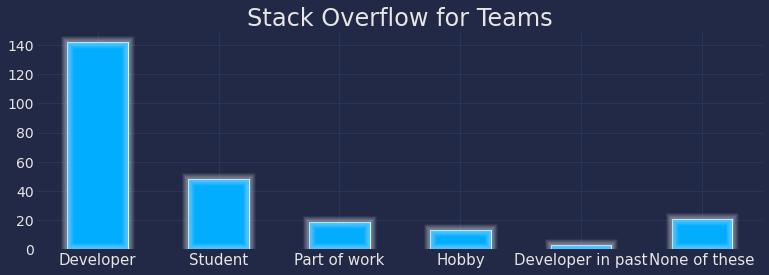

In [74]:
plt.style.use("cyberpunk")

fig, ax = plt.subplots(figsize=(13,4))
ax.grid(color='#2A3459')
onso.iloc[:,[4]].plot(kind='bar', ax=ax, color = "#00adff")
for n in range(1, n_lines+1):
    onso.iloc[:,[4]].plot(kind='bar',
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            legend=False,
            ax=ax, color="#00adff")
plt.xticks(fontsize = 15, rotation = 0)
plt.yticks(fontsize = 14)
plt.title("Stack Overflow for Teams", fontsize=24)
plt.legend([])
plt.show()

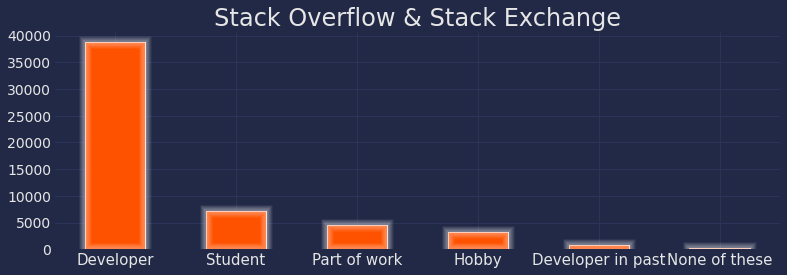

In [75]:
plt.style.use("cyberpunk")

fig, ax = plt.subplots(figsize=(13,4))
onso.iloc[:,[5]].plot(kind='bar', ax=ax, color = "#ff5200")
for n in range(1, n_lines+1):
    onso.iloc[:,[5]].plot(kind='bar',
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            legend=False,
            ax=ax, color="#ff5200")
plt.xticks(fontsize = 15, rotation = 0)
plt.yticks(fontsize = 14)
plt.title("Stack Overflow & Stack Exchange", fontsize=24)
plt.legend([])
plt.show()

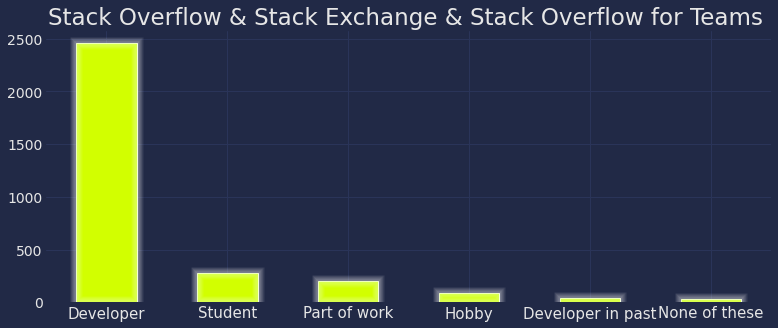

In [76]:
plt.style.use("cyberpunk")

fig, ax = plt.subplots(figsize=(13,5))
onso.iloc[:,[6]].plot(kind='bar', ax=ax, color = "#d2ff00")
for n in range(1, n_lines+1):
    onso.iloc[:,[6]].plot(kind='bar',
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            legend=False,
            ax=ax, color="#d2ff00")
plt.xticks(fontsize = 15, rotation = 0)
plt.yticks(fontsize = 14)
plt.title("Stack Overflow & Stack Exchange & Stack Overflow for Teams ", fontsize=23)
plt.legend([])
plt.show()

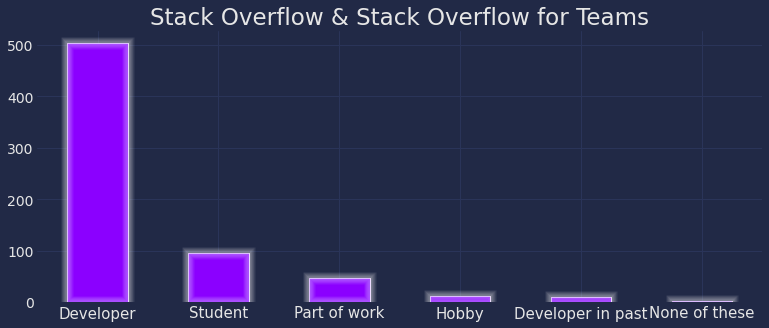

In [77]:
plt.style.use("cyberpunk")

fig, ax = plt.subplots(figsize=(13,5))
onso.iloc[:,[7]].plot(kind='bar', ax=ax, color = "#8b00ff")
for n in range(1, n_lines+1):
    onso.iloc[:,[7]].plot(kind='bar',
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            legend=False,
            ax=ax, color="#8b00ff")
plt.xticks(fontsize = 15, rotation = 0)
plt.yticks(fontsize = 14)
plt.title("Stack Overflow & Stack Overflow for Teams", fontsize=23)
plt.legend([])
plt.show()

# **Thank you for reading my notebook!**